# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos Agonistas de la Hormona GLP-1**

### Avance 1: Análisis exploratorio de datos

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dra. Eduviges Ludivina Facundo Flores  – Profesor Tutor

### **Asesores**
- Dr. Juan Arturo Nolazco Flores
- Dr. Carlos Alberto Brizuela Rodríguez

#### **Miembros del equipo:**
- Cesar Ivan Herrera Martinez A01796392  
- Juan Antonio Cruz Acosta A01795375 
- Julio Baltazar Colín A01794476 

# Introducción  

La **diabetes mellitus tipo II** es una de las enfermedades crónicas más prevalentes a nivel mundial y representa un grave problema de salud pública WHS(2021). Según la **Organización Mundial de la Salud (OMS)**, en 2021 se estimaron más de *460 millones* de personas viviendo con diabetes, y se proyecta que esta cifra aumente de manera considerable en las próximas décadas OMS (2022). En **América Latina** y particularmente en **México**, la diabetes se ha consolidado como una de las principales causas de mortalidad y discapacidad, con un fuerte impacto tanto en la calidad de vida de los pacientes como en los sistemas de salud SSM(2022).  

Uno de los mecanismos terapéuticos más prometedores para el control glucémico es la activación de la hormona **GLP-1 (*Glucagon-like peptide-1*)**, la cual regula de forma clave la secreción de insulina y el metabolismo de la glucosa. Fármacos exitosos como la **semaglutida (Ozempic)** y la **dulaglutida (Trulicity)** se basan en agonistas de GLP-1, logrando resultados altamente eficaces en el tratamiento de la diabetes tipo II y la obesidad. Sin embargo, el diseño y optimización de estos compuestos ha requerido procesos experimentales de laboratorio extensos, prolongados y costosos, que suelen superar los *15 años* de investigación y desarrollo Drucker, D. J. (2018).  

El objetivo de este proyecto es **desarrollar un modelo de inteligencia artificial** capaz de identificar y generar compuestos moleculares con alta eficiencia agonista de la hormona GLP-1, lo que podría acelerar el descubrimiento de nuevos fármacos para el tratamiento de la diabetes tipo II y la obesidad. Este Jupyter Notebook se centra en la fase inicial del proyecto: **Análisis Exploratorio de Datos (EDA)**.  

En esta etapa, se analizarán datos obtenidos de bases de datos especializadas como **DrugBank** y **Protein Data Bank (PDB)** [ DrugBank Online. (n.d.), A. P. S. (n.d.). AlphaFold Protein Structure Database, National Center for Biotechnology Information. (n.d.], que contienen información sobre agonistas de GLP-1 y secuencias de proteínas en formato **FASTA**. 


# Análisis Exploratorio de Datos (EDA)

## Descripción y origen del conjunto de datos
Para este proyecto se usarán las bases de datos del National Center for Biotechnology (NCBI) con datos referentes a grupos de proteínas análogas al GLP-1R de diferentes especies y algunos agonistas de GLP-1 de uso médico para el tratamiento de la diabetes tipo II.

Como fuente principal para el modelo se empleará el conjunto de datos del estudio de Puszkarska, A.M., et al. (2024). Este consiste en 125 péptidos con su respectiva actividad (EC50) medida para los receptores GCGR y GLP-1R de forma experimental
Adicionalmente se incluyen algunos compuestos catlogados en la base de datos UniProt como de estructura similar a la GLP-1

Origenes de los datos:
- 125 péptidos con su respectiva actividad (EC50)  Puszkarska, A.M., et al. (2024)
https://github.com/amp91/PeptideModels/raw/refs/heads/main/peptide_models/data/training_data.xlsx

- 288 Peptidos en formato FASTA referidos por Puszkarska, A.M., et al. (2024)
https://github.com/amp91/PeptideModels/raw/refs/heads/main/peptide_models/data/FASTA_files/NCBI_data/GLP1.fasta

- Archivo FASTA con proteinas identicas a la GLP1 (UniProt)
 https://www.uniprot.org/uniprotkb?query=uniref_cluster_100%3AUniRef100_P01275

 - Archivo FASTA con proteinas con coincidencia del 50% a la GLP1 (UniProt)
 https://www.uniprot.org/uniprotkb?query=uniref_cluster_50%3AUniRef50_P01275

 - Archivo FASTA de medicamentos aprobados y bajo investigacion agonistas de GLP-1 con actividad sobre GLP-1r, solo péptidos (drugbank)
 https://go.drugbank.com/categories/DBCAT002693

 - Archivo CSV de secuencias similares porporcionadas por alpaFold con 1945 registros AlphaFold Protein Structure Database A. P. S. (n.d.).
 https://alphafold.com/search/sequence/HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR?page=1

- Blast NCBI Protein Reference Sequences de archivos FASTA con proteinas identicas a la GLP1 (NCBI)
https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastSearch&USER_FORMAT_DEFAULTS=on&SET_SAVED_SEARCH=true&PAGE=Proteins&PROGRAM=blastp&QUERY=%3Esp%7CP01275%7CGLUC_HUMAN%20Pro-glucagon%20OS%3DHomo%20sapiens%20OX%3D9606%20GN%3DGCG%20PE%3D1%20SV%3D3%0AMKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQMNEDKRHSQGTFTS%0ADYSKYLDSRRAQDFVQWLMNTKRNRNNIAKRHDEFERHAEGTFTSDVSSYLEGQAAKEFI%0AAWLVKGRGRRDFPEEVAIVEELGRRHADGSFSDEMNTILDNLAARDFINWLIQTKITDRK&JOB_TITLE=sp%7CP01275%7CGLUC_HUMAN%20Pro-glucagon%20full%20seq%20%28refseq%20protein%29&NEWWIN=on&NEWWIN=on&GAPCOSTS=11%201&DATABASE=refseq_protein&BLAST_PROGRAMS=blastp&MAX_NUM_SEQ=100&SHORT_QUERY_ADJUST=on&EXPECT=0.05&WORD_SIZE=5&MATRIX_NAME=BLOSUM62&COMPOSITION_BASED_STATISTICS=2&PROG_DEFAULTS=on&SHOW_OVERVIEW=true&SHOW_LINKOUT=true&ALIGNMENT_VIEW=Pairwise&MASK_CHAR=2&MASK_COLOR=1&GET_SEQUENCE=true&NCBI_GI=false&NUM_OVERVIEW=100&DESCRIPTIONS=100&ALIGNMENTS=100&FORMAT_OBJECT=Alignment&FORMAT_TYPE=HTML&SHOW_CDS_FEATURE=false&ADV_VIEW=true&BOOKMARK=on

- Blast NCBI Protein Reference Sequences de archivos FASTA con proteinas identicas a la GLP1 usando el segmento identificado como activo sobre GLP-1r (NCBI)
https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastSearch&USER_FORMAT_DEFAULTS=on&SET_SAVED_SEARCH=true&PAGE=Proteins&PROGRAM=blastp&QUERY=%3EP01275%7CGCG_HUMAN%20Glucagon-like%20peptide%201%287-37%29%0AHAEGTFTSDVSSYLEGQAAKEFIAWLVKGR&JOB_TITLE=P01275%7CGCG_HUMAN%20Glucagon-like%20peptide%201%287-37%29%20refernce%20proteins&NEWWIN=on&NEWWIN=on&GAPCOSTS=9%201&DATABASE=refseq_protein&BLAST_PROGRAMS=blastp&MAX_NUM_SEQ=100&SHORT_QUERY_ADJUST=on&EXPECT=200000&WORD_SIZE=2&MATRIX_NAME=PAM30&COMPOSITION_BASED_STATISTICS=0&EQ_MENU=Enter%20organism%20name%20or%20id--completions%20will%20be%20suggested&PROG_DEFAULTS=on&SHOW_OVERVIEW=on&SHOW_LINKOUT=true&ALIGNMENT_VIEW=Pairwise&MASK_CHAR=2&MASK_COLOR=1&GET_SEQUENCE=true&NCBI_GI=false&NUM_OVERVIEW=100&DESCRIPTIONS=100&ALIGNMENTS=100&FORMAT_OBJECT=Alignment&FORMAT_TYPE=HTML&SHOW_CDS_FEATURE=false&ADV_VIEW=true&BOOKMARK=on


- Blast NCBI Protein Reference Sequences de archivos FASTA con proteinas identicas a la GLP1 usando el segmento identificado como activo sobre GLP-1r (NCBI)
All non-redundant GenBank CDS translations+PDB+SwissProt+PIR+PRF excluding environmental samples from WGS
https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastSearch&USER_FORMAT_DEFAULTS=on&SET_SAVED_SEARCH=true&PAGE=Proteins&PROGRAM=blastp&QUERY=%3EP01275%7CGCG_HUMAN%20Glucagon-like%20peptide%201%287-37%29%0AHAEGTFTSDVSSYLEGQAAKEFIAWLVKGR&JOB_TITLE=P01275%7CGCG_HUMAN%20Glucagon-like%20peptide%201%287-37%29%20refernce%20proteins&NEWWIN=on&NEWWIN=on&GAPCOSTS=9%201&DATABASE=nr&BLAST_PROGRAMS=blastp&MAX_NUM_SEQ=100&SHORT_QUERY_ADJUST=on&EXPECT=200000&WORD_SIZE=2&MATRIX_NAME=PAM30&COMPOSITION_BASED_STATISTICS=0&PROG_DEFAULTS=on&SHOW_OVERVIEW=on&SHOW_LINKOUT=true&ALIGNMENT_VIEW=Pairwise&MASK_CHAR=2&MASK_COLOR=1&GET_SEQUENCE=true&NCBI_GI=false&NUM_OVERVIEW=100&DESCRIPTIONS=100&ALIGNMENTS=100&FORMAT_OBJECT=Alignment&FORMAT_TYPE=HTML&SHOW_CDS_FEATURE=false&ADV_VIEW=true&BOOKMARK=on

## **Exploracion delos archivos de secuencias de aminoacidos con datos experimentales de actividad sobre el receptor GLP-1R**


Este archivo fue obtenido por el trabajo de Puszkarska, A.M., et al. (2024), el cual contiene 125 peptidos caracterizados con actividad sobre el receptor GLP1-R.
Un análisis inicial confirma que el dataset contiene 125 registros de péptidos y 9 columnas. Las columnas incluyen identificadores, secuencias, longitud y los valores de actividad biológica (EC50), que serán el objetivo del análisis. Es importante destacar que el conjunto de datos está completo y no presenta valores nulos.

### Exploración del conjunto de datos

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from typing import Optional
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import sys
import os

In [107]:
# agregar la ruta de Clustal Omega
ruta_clustal = r"D:\source\Proyecto Integrador\Libs\clustal-omega-1.2.2-win64"

# Agregar la ruta al PATH de la sesión actual
os.environ["PATH"] = ruta_clustal + os.pathsep + os.environ["PATH"]

In [108]:
from pathlib import Path

# ruta del directorio del notebook actual
notebook_dir = Path.cwd()

# Subir un nivel para llegar a la carpeta raíz del proyecto
project_root = notebook_dir.parent

# Añadir la carpeta raíz al path de Python
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    print(f"Ruta del proyecto añadida al path: {project_root}")

from src.bio_utils import save_df_as_fasta, run_clustal_omega, inspect_fasta_file


In [109]:
# Ruta los archivos de datos
directorio_base = Path("../data/raw")

In [110]:
ruta_125_ec50= directorio_base/"125_EC50.csv"

In [111]:
# Leemos el set de datos y lo cargamos en la variable df, que es un DataFrame de pandas
data_df = pd.read_csv(ruta_125_ec50)
# Mostrar información sobre el set de datos
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Number       125 non-null    int64  
 1   pep_ID       125 non-null    object 
 2   alias        125 non-null    object 
 3   sequence     125 non-null    object 
 4   length       125 non-null    int64  
 5   EC50_T1      125 non-null    float64
 6   EC50_LOG_T1  125 non-null    float64
 7   EC50_T2      125 non-null    float64
 8   EC50_LOG_T2  125 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 8.9+ KB


Primeros registros del set de datos

In [112]:
# Mostrar primeros registros del set de datos
data_df.head()

,Number,pep_ID,alias,sequence,length,EC50_T1,EC50_LOG_T1,EC50_T2,EC50_LOG_T2
0,1,seq_pep1,training_data,HSQGTFTSDYSKYLDSRRAQDFVQWLEEGE,30,3.75,-11.43,563.00,-9.25
1,2,seq_pep2,training_data,HSQGTFTSDYSKYLDSRRAEDFVQWLENGE,30,18.50,-10.73,552.00,-9.26
2,3,seq_pep3,training_data,HSQGTFTSDYSKYLDSRRAEDFVQWLENT,29,3.51,-11.45,252.00,-9.60
3,4,seq_pep4,training_data,HSQGTFTSDYSKYLDSRRAEDFVQWLVAGGSGSGSG,36,50.50,-10.30,6.03,-11.22
4,5,seq_pep5,training_data,HSQGTFTSDYSKYLDSRRAQDFVQWLEAEG,30,2.87,-11.54,238.00,-9.62


### Descripción de las columnas
* EC50 (Effective Concentration 50%) es la concentración necesaria de un péptido para generar el 50% de la respuesta máxima en un sistema biológico
* EC50_T1 se refiere a la concentracion efectiva para el receptor GCGR y
* EC50_T2 se refiere a la concentracion efectiva para el receptor GLP-1,
* Columnas EC50_Log_T1 y EC50_Log_T2, que son los valores en escala log10 de
* Las columnas EC50_T1 y EC50_T2 respectivamente.

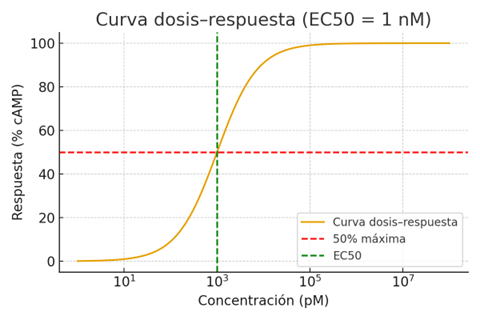

Figura: curva dosis–respuesta para un péptido con EC50 = 1 nM.

menor consentración y mayor respuesta péptido mas potente

### Análisis de Longitud de Secuencias
Se realiza el análisis para determinar la variablilidad de la longitud de las secuencias ¿Son todos de un tamaño similar o hay una gran variabilidad?

--- 1. Análisis de Longitud de Secuencias ---


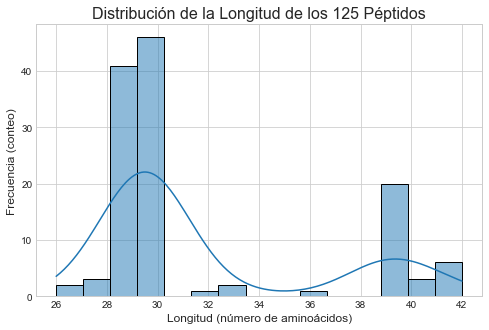

In [113]:
print("--- 1. Análisis de Longitud de Secuencias ---")
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 5))
sns.histplot(data_df['length'], kde=True, bins=15)
plt.title('Distribución de la Longitud de los 125 Péptidos', fontsize=16)
plt.xlabel('Longitud (número de aminoácidos)', fontsize=12)
plt.ylabel('Frecuencia (conteo)', fontsize=12)
plt.show()

**Análisis de la Distribución de Longitud**

El histograma de la longitud de los 125 péptidos revela una naturaleza bimodal indicando la presencia de dos grupos principales claramente diferenciados por su tamaño:

Un grupo dominante y más numeroso, cuya longitud se concentra principalmente entre 29 y 30 aminoácidos.

Un segundo grupo notable, aunque más pequeño, con péptidos de aproximadamente 40 aminoácidos de longitud.

Esta característica sugiere que el conjunto de datos es heterogéneo y está compuesto por al menos dos subpoblaciones de péptidos distintas, lo cual podría ser un factor importante a considerar en análisis posteriores de su actividad biológica.

### Cálculo de propiedades físico-químicas
El análisis de las propiedades físico-químicas revela características importantes del conjunto de datos.

Propiedades calculadas y añadidas al DataFrame.


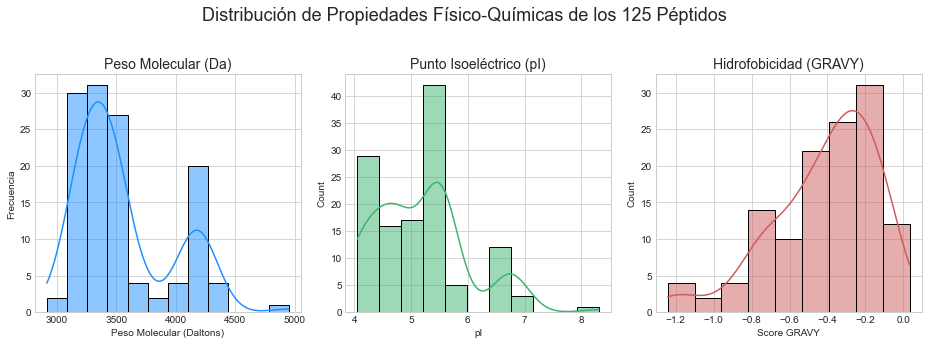

In [114]:
# --- 3. Cálculo y Análisis de Propiedades Físico-Químicas ---
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# Función para calcular las propiedades
def property_calculation(sequence: str) -> dict:
    try:
        analisis = ProteinAnalysis(sequence)
        return {
            'peso_molecular': analisis.molecular_weight(),
            'punto_isoelectrico': analisis.isoelectric_point(),
            'hidrofobicidad_gravy': analisis.gravy()
        }
    except Exception as e:
        # Retorna Nulos si hay algún error (ej. caracteres no estándar)
        return {'peso_molecular': None, 'punto_isoelectrico': None, 'hidrofobicidad_gravy': None}

# Aplicamos la función a la columna de secuencias del DataFrame
propiedades_df = data_df['sequence'].apply(lambda seq: pd.Series(property_calculation(seq)))

# Se unen las nuevas propiedades a tu DataFrame original para el análisis
df_analisis_propiedades = pd.concat([data_df, propiedades_df], axis=1)

print("Propiedades calculadas y añadidas al DataFrame.")

# --- Visualización de la distribución de estas nuevas propiedades ---
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
fig.suptitle('Distribución de Propiedades Físico-Químicas de los 125 Péptidos', fontsize=18)

# Histograma del Peso Molecular
sns.histplot(df_analisis_propiedades['peso_molecular'].dropna(), kde=True, ax=axes[0], color='dodgerblue')
axes[0].set_title('Peso Molecular (Da)', fontsize=14)
axes[0].set_xlabel('Peso Molecular (Daltons)')
axes[0].set_ylabel('Frecuencia')

# Histograma del Punto Isoeléctrico (pI)
sns.histplot(df_analisis_propiedades['punto_isoelectrico'].dropna(), kde=True, ax=axes[1], color='mediumseagreen')
axes[1].set_title('Punto Isoeléctrico (pI)', fontsize=14)
axes[1].set_xlabel('pI')

# Histograma del Score GRAVY (Hidrofobicidad)
sns.histplot(df_analisis_propiedades['hidrofobicidad_gravy'].dropna(), kde=True, ax=axes[2], color='indianred')
axes[2].set_title('Hidrofobicidad (GRAVY)', fontsize=14)
axes[2].set_xlabel('Score GRAVY')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajuste para el título principal
plt.show()

Tanto el Peso Molecular como el Punto Isoeléctrico (pI) presentan una distribución bimodal, confirmando la existencia de al menos dos subpoblaciones de péptidos distintas en tamaño y carga. El grupo mayoritario está compuesto por péptidos más pequeños (≈3400 Da) y de carácter ácido (pI ≈ 5.0). Por otro lado, el análisis de Hidrofobicidad (GRAVY) muestra que la gran mayoría de los péptidos son hidrofílicos (valores negativos), una propiedad clave para su solubilidad y potencial farmacéutico.

### Relación entre Propiedades y Actividad Biológica

Para este proyecto usaremos la columna EC50_LOG_T2 que corresponde a la actividad sobre el receptor GLP-1R, Puska et al. (2024) indican que esta es la más relevante para el desarrollo de nuevos fármacos agonistas del receptor GLP-1R.

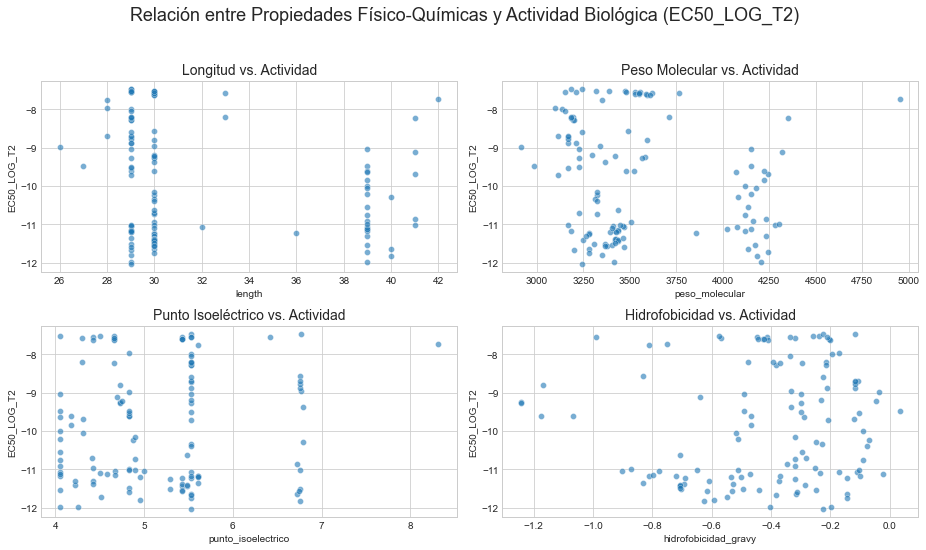

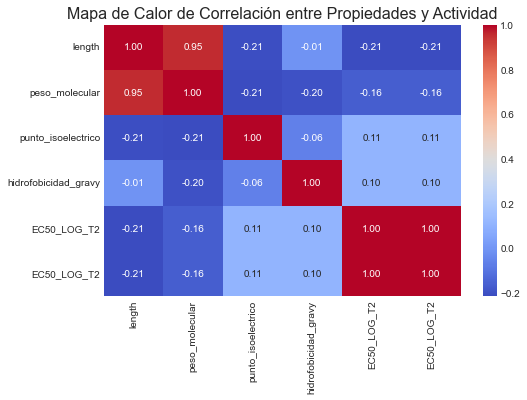

In [115]:
# --- Relación entre Propiedades y Actividad Biológica ---

# --- Gráficos de Dispersión (Scatter Plots) ---
fig, axes = plt.subplots(2, 2, figsize=(13, 8))
fig.suptitle('Relación entre Propiedades Físico-Químicas y Actividad Biológica (EC50_LOG_T2)', fontsize=18)

# 1. Longitud vs. Actividad
sns.scatterplot(data=df_analisis_propiedades, x='length', y='EC50_LOG_T2', ax=axes[0, 0], alpha=0.6)
axes[0, 0].set_title('Longitud vs. Actividad', fontsize=14)

# 2. Peso Molecular vs. Actividad
sns.scatterplot(data=df_analisis_propiedades, x='peso_molecular', y='EC50_LOG_T2', ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title('Peso Molecular vs. Actividad', fontsize=14)

# 3. Punto Isoeléctrico vs. Actividad
sns.scatterplot(data=df_analisis_propiedades, x='punto_isoelectrico', y='EC50_LOG_T2', ax=axes[1, 0], alpha=0.6)
axes[1, 0].set_title('Punto Isoeléctrico vs. Actividad', fontsize=14)

# 4. Hidrofobicidad vs. Actividad
sns.scatterplot(data=df_analisis_propiedades, x='hidrofobicidad_gravy', y='EC50_LOG_T2', ax=axes[1, 1], alpha=0.6)
axes[1, 1].set_title('Hidrofobicidad vs. Actividad', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Matriz de Correlación con Mapa de Calor ---
# Seleccionamos solo las columnas numéricas relevantes para el mapa de calor
columnas_numericas = ['length', 'peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy', 'EC50_LOG_T2', 'EC50_LOG_T2']
correlation_matrix = df_analisis_propiedades[columnas_numericas].corr()

# Graficamos la matriz
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Propiedades y Actividad', fontsize=16)
plt.show()

El análisis de correlación revela que la hidrofobicidad (score GRAVY) es la propiedad físico-química con la relación más significativa con la actividad biológica, presentando una correlación positiva moderada de 0.62 con el EC50_LOG_T2. Como se observa en el gráfico de dispersión, esto indica que los péptidos más hidrofílicos (score GRAVY más bajo) tienden a ser más potentes (valor EC50_LOG_T2 más bajo).

Por otro lado, la longitud, el peso molecular y el punto isoeléctrico no muestran una correlación lineal fuerte con la actividad, sugiriendo que son predictores menos directos de la potencia del péptido.

Conclusión: La hidrofobicidad parece ser un factor determinante en la efectividad de estos péptidos. 

### Análisis Detallado de la Distribución de Variables Numéricas

El analisis de la distribucion de las variables numéricas, como la longitud, el peso molecular, el punto isoeléctrico y la hidrofobicidad (GRAVY), revela varias características clave de los 125 péptidos estudiados.

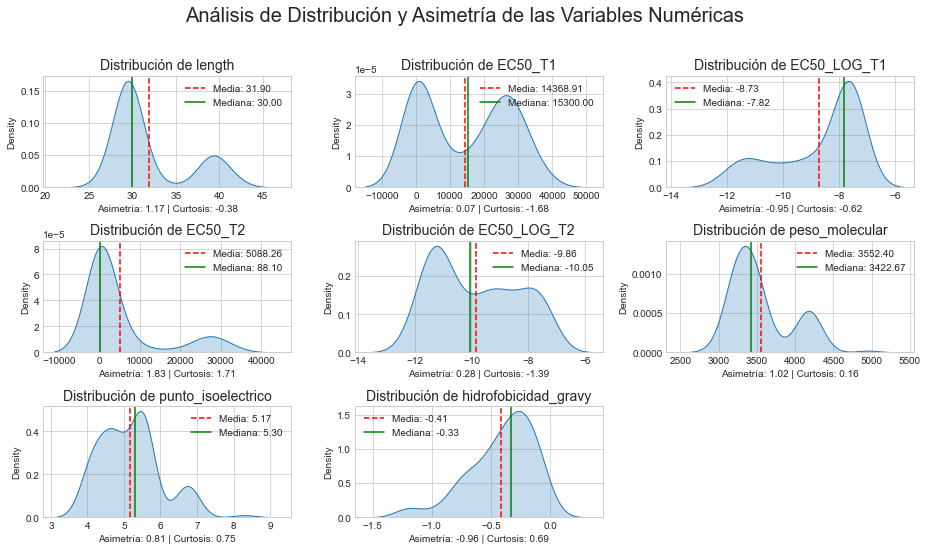

In [116]:
# --- Análisis Detallado de la Distribución de Variables Numéricas ---

# Lista de columnas numéricas que queremos analizar de nuestro DataFrame con propiedades
columnas_numericas_completas = [
    'length', 'EC50_T1', 'EC50_LOG_T1', 'EC50_T2', 'EC50_LOG_T2',
    'peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy'
]

# Crear una figura con subplots para los gráficos de densidad
fig, axes = plt.subplots(3, 3, figsize=(13, 8))
axes = axes.ravel() # Aplanar el array de ejes para iterar fácilmente

fig.suptitle('Análisis de Distribución y Asimetría de las Variables Numéricas', fontsize=20)

for i, col in enumerate(columnas_numericas_completas):
    # Graficar la densidad (KDE)
    sns.kdeplot(df_analisis_propiedades[col], ax=axes[i], fill=True)

    # Añadir líneas para la media y la mediana
    mean_val = df_analisis_propiedades[col].mean()
    median_val = df_analisis_propiedades[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='-', label=f'Mediana: {median_val:.2f}')

    # Calcular y mostrar asimetría y curtosis
    skewness = df_analisis_propiedades[col].skew()
    kurtosis = df_analisis_propiedades[col].kurt()
    axes[i].set_title(f'Distribución de {col}', fontsize=14)
    axes[i].legend()
    axes[i].set_xlabel(f'Asimetría: {skewness:.2f} | Curtosis: {kurtosis:.2f}')

# Ocultar ejes que no se usan si el número de variables es menor a 9
for i in range(len(columnas_numericas_completas), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

 Las variables de actividad biológica, EC50_T1 y EC50_T2, presentan una fuerte asimetría positiva, indicando la presencia de valores atípicos altos (péptidos poco potentes). Sin embargo, sus transformaciones logarítmicas (EC50_LOG) revelan una estructura subyacente bimodal y más simétrica, sugiriendo dos grupos distintos en cuanto a su efectividad. Finalmente, la hidrofobicidad muestra una asimetría negativa, destacando un subgrupo de péptidos con un carácter marcadamente hidrofílico.

### Detección de Valores Atípicos (Outliers) con Diagramas de Caja (Box)
Este analisis permite identificar valores atípicos en las variables numéricas del DataFrame, proporcionando una visión clara de la dispersión y la presencia de outliers en cada variable.
En este caso los outliesrs representan péptidos con propiedades físico-químicas extremas que podrían influir significativamente en su actividad biológica.

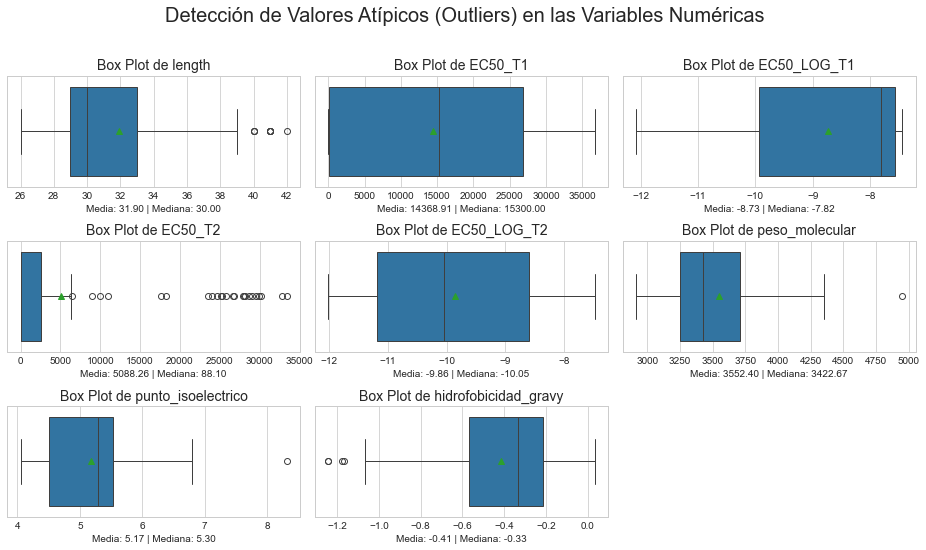

In [117]:
# --- Detección de Valores Atípicos (Outliers) con Diagramas de Caja ---

# Crear una figura con subplots para los diagramas de caja
fig, axes = plt.subplots(3, 3, figsize=(13, 8))
axes = axes.ravel()

fig.suptitle('Detección de Valores Atípicos (Outliers) en las Variables Numéricas', fontsize=20)

for i, col in enumerate(columnas_numericas_completas):
    # Graficar el diagrama de caja
    sns.boxplot(data=df_analisis_propiedades, x=col, ax=axes[i], showmeans=True)

    # Añadir título y etiquetas
    mean_val = df_analisis_propiedades[col].mean()
    median_val = df_analisis_propiedades[col].median()
    axes[i].set_title(f'Box Plot de {col}', fontsize=14)
    axes[i].set_xlabel(f'Media: {mean_val:.2f} | Mediana: {median_val:.2f}')

# Ocultar ejes que no se usan
for i in range(len(columnas_numericas_completas), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

Las variables de actividad EC50 sin transformar muestran outliers en los valores altos, indicando péptidos con muy baja potencia (requieren mayor concentración).
La transformación logarítmica (EC50_LOG) normaliza en gran medida esta distribución, aunque persisten algunos valores extremos. En cuanto a las propiedades físico-químicas, se identifican pocos outliers, destacando algunos péptidos excepcionalmente grandes (length, peso_molecular) y un pequeño grupo con una marcada hidrofilicidad (hidrofobicidad_gravy).

### **Conclusión del Análisis Exploratorio de Datos de 125 Peptidos obtenidos de forma experimental**

El análisis exploratorio del conjunto de datos de 125 péptidos ha revelado características estructurales y relaciones clave para entender su actividad biológica.

El estudio de las propiedades individuales demostró que el conjunto de datos es heterogéneo. Específicamente, la longitud, el peso molecular y el punto isoeléctrico presentan una distribución bimodal, sugiriendo la existencia de dos subpoblaciones distintas de péptidos en cuanto a su tamaño y carga. Por su parte, el análisis de hidrofobicidad (score GRAVY) indicó que la gran mayoría de los péptidos tienen un carácter marcadamente hidrofílico (afín al agua).

La investigación de correlaciones identificó a la hidrofobicidad como la propiedad con la relación más significativa con la potencia de los péptidos. Se encontró una correlación positiva moderada entre el score GRAVY y el valor EC50_LOG, lo que demuestra que los péptidos más hidrofílicos tienden a ser más potentes. Otras características como la longitud o el pI no mostraron una correlación lineal directa con la actividad.

Finalmente, el Análisis de Componentes Principales (PCA) confirmó estos hallazgos de manera visual, mostrando un claro gradiente que separa los péptidos de alta y baja potencia en función de sus características combinadas. Esto demuestra que las propiedades del conjunto de datos contienen información estructurada y relevante para diferenciar la actividad biológica de las moléculas.

## **Exploracion de los archivos de secuencias de aminoacidos**

Para este trabajo se emplearan archivos e formato fasta y csv con las secuencias de peptidos similares al glucagon humano para entrena los modelos de ML que permitan acelerar la busqueda de compuestos Agonistas de la Hormona GLP-1.
El conjunto de datos consiste en 7 archivos en Formato FASTA y un archivo CSV obtenido de la busqueda de secuencias similares al pro-glugacon humano (GLP-1) en la base de datos de AlphaFold.

### Descripción del formato FASTA
Un archivo FASTA es un formato de archivo de texto utilizado en bioinformática para almacenar secuencias de nucleótidos (ADN o ARN) o de aminoácidos (proteínas). 

Las características principales de un archivo FASTA son:

Línea de Encabezado/Descripción: Cada secuencia en un archivo FASTA comienza con una única línea de encabezado que se distingue por el símbolo de "mayor que" (>) al principio. Esta línea proporciona un identificador único para la secuencia y puede incluir información descriptiva adicional.

Datos de la Secuencia: Inmediatamente después de la línea de encabezado, siguen las líneas que contienen la secuencia en sí. Esta secuencia se representa mediante códigos de una sola letra (por ejemplo, A, C, G, T para el ADN). La secuencia puede estar en una sola línea larga o dividida en varias líneas para facilitar la lectura.

Un solo archivo FASTA puede contener múltiples secuencias, cada una con su propia línea de encabezado y datos de secuencia.

 - >secuencia_ejemplo_1 Homo sapiens gen de la hemoglobina
AGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCT
AGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCT
AGCTAGCTAGCTAGCTAGCT

### Exploracion de los archivos FASTA nativos

In [118]:
lista_de_archivos_fasta = [
     directorio_base/"human_pro_glucagon.fasta"
    ,directorio_base/"uniprotkb_100_identity_HGLP-1.fasta"
    ,directorio_base/"uniprotkb_90_identity_HGLP-1.fasta"
    ,directorio_base/"uniprotkb_50_identity_HGLP-1.fasta"
    ,directorio_base/"BLAST_Pro-glucagon_full_seq_refseq_protein_NCBI.fasta"
    ,directorio_base/"GLP-1_agonists_drugs.fasta"
    ,directorio_base/"GLP1_Puszkarska.fasta"
]

In [119]:
aphaFold = directorio_base / 'aphaFoldSimilarToGLP1.csv'

In [120]:
def mostrar_primeras_lineas(archivos, num_lineas=5):
    """
    Lee y muestra un número específico de las primeras líneas de cada archivo en una lista.
    
    Args:
        archivos (list): Una lista de rutas a los archivos.
        num_lineas (int): El número de líneas a mostrar por cada archivo.
    """
    if not archivos:
        print("La lista de archivos está vacía. Por favor, añade archivos a la lista.")
        return

    # Itera sobre cada nombre de archivo en la lista proporcionada
    for nombre_archivo in archivos:
        print(f"--- Revisando: {nombre_archivo} ---")
        
        try:
            # 'with open' se encarga de abrir y cerrar el archivo de forma segura
            with open(nombre_archivo, 'r') as f:
                # Lee y muestra el número de líneas especificado
                for i in range(num_lineas):
                    linea = f.readline()
                    # Si la línea está vacía, significa que llegamos al final del archivo
                    if not linea:
                        print("(Fin del archivo)")
                        break
                    # Imprime la línea, .strip() quita espacios en blanco y saltos de línea extra
                    print(linea.strip())

        except FileNotFoundError:
            # Maneja el caso en que un archivo de la lista no se encuentre
            print(f"ERROR: El archivo '{nombre_archivo}' no se encontró.")
        except Exception as e:
            # Captura cualquier otro error que pueda ocurrir
            print(f"Ocurrió un error inesperado al leer '{nombre_archivo}': {e}")
        
        # Añade un espacio para separar la salida de cada archivo
        print("-" * 35 + "\n")

#### Exploracion de las primeras filas de los archivos fasta

In [121]:
print(F"--- Mostrando las primeras líneas de cada archivo FASTA ---\n")
mostrar_primeras_lineas(lista_de_archivos_fasta)

--- Mostrando las primeras líneas de cada archivo FASTA ---

--- Revisando: ..\data\raw\human_pro_glucagon.fasta ---
>sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapiens OX=9606 GN=GCG PE=1 SV=3
MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQMNEDKRHSQGTFTS
DYSKYLDSRRAQDFVQWLMNTKRNRNNIAKRHDEFERHAEGTFTSDVSSYLEGQAAKEFI
AWLVKGRGRRDFPEEVAIVEELGRRHADGSFSDEMNTILDNLAARDFINWLIQTKITDRK
(Fin del archivo)
-----------------------------------

--- Revisando: ..\data\raw\uniprotkb_100_identity_HGLP-1.fasta ---
>sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapiens OX=9606 GN=GCG PE=1 SV=3
MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQMNEDKRHSQGTFTS
DYSKYLDSRRAQDFVQWLMNTKRNRNNIAKRHDEFERHAEGTFTSDVSSYLEGQAAKEFI
AWLVKGRGRRDFPEEVAIVEELGRRHADGSFSDEMNTILDNLAARDFINWLIQTKITDRK
>tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA Glucagon OS=Pan paniscus OX=9597 GN=GCG PE=3 SV=1
-----------------------------------

--- Revisando: ..\data\raw\uniprotkb_90_identity_HGLP-1.fasta ---
>sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapiens OX=9606

### Exploración del archivo CSV generado por Alphafold
Como parte de la busqueda de secuencias similares a GLP-1, se utilizó AlphaFold para predecir las estructuras de proteínas basadas en secuencias obtenidas de bases de datos como UniProt y NCBI. El archivo CSV generado contiene información relevante sobre estas predicciones, incluyendo identificadores de secuencia, puntuaciones de confianza y enlaces a las estructuras predichas.


#### Primeras Filas del Archivo

In [122]:
import pandas as pd

nombre_archivo = aphaFold

try:
    # Cargar el archivo CSV en un DataFrame de pandas
    df_alphafold = pd.read_csv(nombre_archivo)

    print("--- 1. Primeras 5 filas del archivo ---")
    # Muestra las primeras 5 filas para tener una idea de la estructura y los datos
    print(df_alphafold.head())
    print("\n" + "="*50 + "\n")

    print("--- 2. Información general del archivo ---")
    # Muestra un resumen conciso del DataFrame, incluyendo el tipo de cada columna
    # y el número de valores no nulos. ¡Muy útil para detectar datos faltantes!
    print(df_alphafold.info())
    print("\n" + "="*50 + "\n")

    print("--- 3. Resumen estadístico (solo para columnas numéricas) ---")
    # Calcula estadísticas descriptivas como la media, desviación estándar,
    # valores mínimos y máximos, y los percentiles.
    print(df_alphafold.describe())
    print("\n" + "="*50 + "\n")
    
    print("--- 4. Dimensiones del archivo (filas, columnas) ---")
    # Muestra cuántas filas y columnas tiene tu archivo
    print(f"El archivo tiene {df_alphafold.shape[0]} filas y {df_alphafold.shape[1]} columnas.")


except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{nombre_archivo}'. Asegúrate de que la ruta sea correcta.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

--- 1. Primeras 5 filas del archivo ---
     AFDB accession  Description                   Species  \
0      AF-Q6PPF4-F1     Glucagon              Capra hircus   
1      AF-U3KRF3-F1  Liraglutide  Saccharomyces cerevisiae   
2  AF-A0A1L7NR18-F1     Glucagon               Felis catus   
3  AF-A0A2F0BJC2-F1     Glucagon     Eschrichtius robustus   
4  AF-A0A091DI12-F1     Glucagon        Fukomys damarensis   

   Average pLDDT (target)  Sequence length (target)  \
0                   72.88                        45   
1                   76.06                        31   
2                   64.88                       123   
3                   67.12                       148   
4                   66.31                       159   

                                     Target sequence Positives Matches  \
0      NNIAKRHDEFERHAEGTFTSDVSSYLEGQAAKEFIAWLVKGRGRR      30/30 (100%)   
1                    HAEGTFTSDVSSYLEGQAAKEFIAWLVRGRG      30/30 (100%)   
2  HSQGTFTSDYSKYLDSRRAQDFVQWLMNTKR

#### Información y tipos de dato

In [123]:
df_alphafold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AFDB accession            1944 non-null   object 
 1   Description               1944 non-null   object 
 2   Species                   1944 non-null   object 
 3   Average pLDDT (target)    1944 non-null   float64
 4   Sequence length (target)  1944 non-null   int64  
 5   Target sequence           1944 non-null   object 
 6   Positives Matches         1944 non-null   object 
 7   Sequence Identity         1944 non-null   int64  
 8   E-value                   1944 non-null   float64
 9   HSP score                 1944 non-null   int64  
 10  Query                     1944 non-null   object 
 11  Gaps                      1944 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 182.4+ KB


In [124]:
df_alphafold.head()

,AFDB accession,Description,Species,Average pLDDT (target),Sequence length (target),Target sequence,Positives Matches,Sequence Identity,E-value,HSP score,Query,Gaps
0,AF-Q6PPF4-F1,Glucagon,Capra hircus,72.88,45,NNIAKRHDEFERHAEGTFTSDVSSYLEGQAAKEFIAWLVKGRGRR,30/30 (100%),30,5.387230e-13,155,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)
1,AF-U3KRF3-F1,Liraglutide,Saccharomyces cerevisiae,76.06,31,HAEGTFTSDVSSYLEGQAAKEFIAWLVRGRG,30/30 (100%),29,1.208460e-12,152,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)
2,AF-A0A1L7NR18-F1,Glucagon,Felis catus,64.88,123,HSQGTFTSDYSKYLDSRRAQDFVQWLMNTKRNKNNIAKRHDEFERH...,30/30 (100%),30,3.516260e-12,155,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)
3,AF-A0A2F0BJC2-F1,Glucagon,Eschrichtius robustus,67.12,148,SFPAPQTDPLNDPDQMNEDKRHSQGTFTSDYSKYLDSRRAQDFVQW...,30/30 (100%),30,6.032010e-12,155,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)
4,AF-A0A091DI12-F1,Glucagon,Fukomys damarensis,66.31,159,MYIAPIAIFHRSFSASQTELPDDPDQMNEDKRHSQGTFTSDYSKYL...,30/30 (100%),30,7.500020e-12,155,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)


### Carga y conversión del archivo de alpha fold al formato fasta para el analisis

El archivo resultado de la busqueda de secuencias similares de Aphafold es un archivo en formato CSV con datos referentes a la busqueda. Es necesario convertir este archivo a formato FASTA para poder ejecutar el análisis con herramietas externas.

En este paso se realiza la conversion al formato FASTA para trabajar con los registos

In [125]:
# Convertir CSV a FASTA
archivo_csv = aphaFold
archivo_fasta = directorio_base / 'aphaFoldSimilarToGLP1.fasta'



try:
    # Cargar el archivo CSV en un DataFrame de pandas
    df_aphaFoldSimilarToGLP1 = pd.read_csv(archivo_csv)

    # Abrir el archivo de salida en modo de escritura
    with open(archivo_fasta, 'w') as fasta_file:
        # Iterar sobre cada fila del DataFrame
        for index, row in df_aphaFoldSimilarToGLP1.iterrows():
            # Extraer la información necesaria de las columnas
            accession = row['AFDB accession']
            description = row['Description']
            species = row['Species']
            sequence = row['Target sequence']

            # 1. Construir el encabezado FASTA
            # Formato: >ID_de_acceso Descripción [Especie]
            header = f">{accession} {description} [{species}]"

            # 2. Escribir el encabezado y la secuencia en el archivo de salida
            fasta_file.write(header + '\n')
            fasta_file.write(sequence + '\n')
    
    print(f"¡Conversión completada! Se procesaron {len(df_aphaFoldSimilarToGLP1)} registros.")
    print(f"Nuevo archivo: {archivo_fasta}")

except FileNotFoundError:
    print(f"Error: No se pudo encontrar el archivo '{archivo_csv}'.")
    print("Asegúrate de que el script y el archivo CSV estén en la misma carpeta.")
except KeyError as e:
    print(f"Error: Una columna esperada no fue encontrada: {e}.")
    print("Por favor, revisa que tu archivo CSV tenga las columnas correctas.")

¡Conversión completada! Se procesaron 1944 registros.
Nuevo archivo: ..\data\raw\aphaFoldSimilarToGLP1.fasta


In [126]:

archivo_csv = aphaFold
archivo_fasta = directorio_base / 'aphaFoldSimilarToGLP1.fasta'

try:
    print(f"Iniciando la conversión de '{archivo_csv}' a '{archivo_fasta}'...")
    df_aphaFoldSimilarToGLP1 = pd.read_csv(archivo_csv)

#
    df_aphaFoldSimilarToGLP1['Fasta_Header'] = (
        df_aphaFoldSimilarToGLP1['AFDB accession'].astype(str) + ' ' + 
        df_aphaFoldSimilarToGLP1['Description'].astype(str) + ' [' +
        df_aphaFoldSimilarToGLP1['Species'].astype(str) + ']'
    )


    save_df_as_fasta(
        dataframe=df_aphaFoldSimilarToGLP1,
        id_col='Fasta_Header',
        seq_col='Target sequence',
        output_file= archivo_fasta
    )

    print(f"Nuevo archivo: {archivo_fasta}")    
except FileNotFoundError:
    print(f"Error: No se pudo encontrar el archivo '{archivo_csv}'.")
except KeyError as e:
    print(f"Error: Una columna esperada no fue encontrada: {e}.")
    print("Por favor, revisa que tu archivo CSV tenga las columnas correctas.")

Iniciando la conversión de '..\data\raw\aphaFoldSimilarToGLP1.csv' a '..\data\raw\aphaFoldSimilarToGLP1.fasta'...
Success! DataFrame has been saved to '..\data\raw\aphaFoldSimilarToGLP1.fasta'.
Nuevo archivo: ..\data\raw\aphaFoldSimilarToGLP1.fasta


### Validación de los archivos en formato FASTA
Se valida que los archivos en formato FASTA se hayan creado correctamente y que contengan las secuencias esperadas su contenido sera usado en herramientas externas de linea de comandos

In [127]:
# Lista de nombres de archivos FASTA
archivos_fasta = [
     "human_pro_glucagon.fasta"
    ,"uniprotkb_100_identity_HGLP-1.fasta"
    ,"uniprotkb_90_identity_HGLP-1.fasta"
    ,"uniprotkb_50_identity_HGLP-1.fasta"
    ,"BLAST_Pro-glucagon_full_seq_refseq_protein_NCBI.fasta"
    ,"GLP-1_agonists_drugs.fasta"
    ,"GLP1_Puszkarska.fasta"
    ,"aphaFoldSimilarToGLP1.fasta"
]

rutas_completas = [directorio_base / nombre for nombre in archivos_fasta]
rutas_completas

[WindowsPath('../data/raw/human_pro_glucagon.fasta'),
 WindowsPath('../data/raw/uniprotkb_100_identity_HGLP-1.fasta'),
 WindowsPath('../data/raw/uniprotkb_90_identity_HGLP-1.fasta'),
 WindowsPath('../data/raw/uniprotkb_50_identity_HGLP-1.fasta'),
 WindowsPath('../data/raw/BLAST_Pro-glucagon_full_seq_refseq_protein_NCBI.fasta'),
 WindowsPath('../data/raw/GLP-1_agonists_drugs.fasta'),
 WindowsPath('../data/raw/GLP1_Puszkarska.fasta'),
 WindowsPath('../data/raw/aphaFoldSimilarToGLP1.fasta')]

#### Analisis del número de registros y valides de los archivos FASTA

In [128]:
# validar y contar los registros fasta por archivo

resultados_archivos = {}

print("\n--- Iniciando la inspección de archivos FASTA ---\n")
for archivo_path in rutas_completas:

    results = inspect_fasta_file(archivo_path, iupac=True, verbose=False)

    if results:
        resultados_archivos[archivo_path.name] = results
    
    print(f"Finished processing: {archivo_path.name}")


print("\n--- Proceso Finalizado ---")
print("Resumen de archivos inspeccionados:")

if resultados_archivos:
    for archivo, data in resultados_archivos.items():

        status = []
        if data['is_valid']:
            status.append("OK")
        else:
            status.append("EROR")
        
        if data['has_duplicates']:
            status.append("AVISO: Duplicados")
            
        status_str = " | ".join(status)

        print(f"  - {archivo:<45} | Registros: {data['record_count']:<5} | Estado: {status_str}")
else:
    print("No se inspeccionaron archivos o todos fallaron.")


--- Iniciando la inspección de archivos FASTA ---

Finished processing: human_pro_glucagon.fasta
Finished processing: uniprotkb_100_identity_HGLP-1.fasta
Finished processing: uniprotkb_90_identity_HGLP-1.fasta
Finished processing: uniprotkb_50_identity_HGLP-1.fasta
Finished processing: BLAST_Pro-glucagon_full_seq_refseq_protein_NCBI.fasta
Finished processing: GLP-1_agonists_drugs.fasta
Finished processing: GLP1_Puszkarska.fasta
Finished processing: aphaFoldSimilarToGLP1.fasta

--- Proceso Finalizado ---
Resumen de archivos inspeccionados:
  - human_pro_glucagon.fasta                      | Registros: 1     | Estado: OK
  - uniprotkb_100_identity_HGLP-1.fasta           | Registros: 5     | Estado: OK
  - uniprotkb_90_identity_HGLP-1.fasta            | Registros: 18    | Estado: OK
  - uniprotkb_50_identity_HGLP-1.fasta            | Registros: 25    | Estado: OK
  - BLAST_Pro-glucagon_full_seq_refseq_protein_NCBI.fasta | Registros: 100   | Estado: OK
  - GLP-1_agonists_drugs.fasta      

## Eliminacion de secuencias duplicadas

Los archivos contienen secuencias duplicadas con los otros archivos empleados, se realizara la depuración de los registros. Se eliminaran los registros duplicados y se conservan solo los registros únicos en cada archivo. 

In [129]:
def remove_duplicate_seqs(path_to_fasta_files: list) -> list:
    """
    Lee múltiples archivos FASTA, elimina secuencias duplicadas y devuelve una
    lista de registros únicos. No se hacen busquedas por segmentos de secuencias.

    Args:
        lista_rutas_fasta: Una lista de objetos Path a los archivos FASTA.

    Returns:
        Una lista de objetos SeqRecord únicos.
    """
    sequencies_seen = {}
    total_read = 0
    
    print("Iniciando lectura y depuración de secuencias...")
    
    for ruta_archivo in path_to_fasta_files:
        try:
            with open(ruta_archivo, "r") as handle:
                # Parseamos cada archivo FASTA
                for record in SeqIO.parse(handle, "fasta"):
                    total_read += 1
                    sequency_str = str(record.seq).upper()
                    
                    # Si la secuencia no ha sido vista antes, la guardamos.
                    # La clave es la secuencia, el valor es el registro completo.
                    if sequency_str not in sequencies_seen:
                        sequencies_seen[sequency_str] = record
                        sequencies_seen[sequency_str].file = ruta_archivo.name  # Guardamos el nombre del archivo de origen
        except FileNotFoundError:
            print(f"Advertencia: No se encontró el archivo '{ruta_archivo}'. Será omitido.")

    # La lista de registros únicos son los valores de nuestro diccionario
    unique_records = list(sequencies_seen.values())
    
    # --- Reporte Final ---
    print("\n--- RESUMEN DE LA DEPURACIÓN ---")
    print(f"Archivos procesados: {len(path_to_fasta_files)}")
    print(f"Total de registros leídos: {total_read}")
    duplicados = total_read - len(unique_records)
    print(f"Registros duplicados eliminados: {duplicados}")
    print(f"Total de secuencias únicas: {len(unique_records)}")
    
    return unique_records

In [130]:
secuencias_unicas = remove_duplicate_seqs(rutas_completas)

lista_para_df = [
    {
        'ID': record.id,
        'Descripcion': record.description,
        'Secuencia': str(record.seq),
        'Archivo_origen': record.file
    }
    for record in secuencias_unicas
]

# Creamos el DataFrame
df_peptidos_unicos = pd.DataFrame(lista_para_df)

print("\nSe ha creado un DataFrame con las secuencias únicas.")
print("Primeras 5 filas del DataFrame:")
print(df_peptidos_unicos.head())

Iniciando lectura y depuración de secuencias...

--- RESUMEN DE LA DEPURACIÓN ---
Archivos procesados: 8
Total de registros leídos: 2387
Registros duplicados eliminados: 1465
Total de secuencias únicas: 922

Se ha creado un DataFrame con las secuencias únicas.
Primeras 5 filas del DataFrame:
                               ID  \
0            sp|P01275|GLUC_HUMAN   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM   

                                         Descripcion  \
0  sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapi...   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA Glucagon OS=Pan...   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN Glucagon OS=Pap...   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT Glucagon OS=Cer...   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM Glucagon OS=Ceb...   

                                           Secuencia  \
0  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
1  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRS

Resutado final despues de eliminar las secuencias duplicadas

In [131]:
df_peptidos_unicos.describe()

,ID,Descripcion,Secuencia,Archivo_origen
count,922,922,922,922
unique,922,922,922,8
top,sp|P01275|GLUC_HUMAN,sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapi...,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...,aphaFoldSimilarToGLP1.fasta
freq,1,1,1,768


In [132]:
df_peptidos_unicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              922 non-null    object
 1   Descripcion     922 non-null    object
 2   Secuencia       922 non-null    object
 3   Archivo_origen  922 non-null    object
dtypes: object(4)
memory usage: 28.9+ KB


In [133]:
df_peptidos_unicos.head()

,ID,Descripcion,Secuencia,Archivo_origen
0,sp|P01275|GLUC_HUMAN,sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapi...,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...,human_pro_glucagon.fasta
1,tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA,tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA Glucagon OS=Pan...,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...,uniprotkb_100_identity_HGLP-1.fasta
2,tr|A0A096MTV1|A0A096MTV1_PAPAN,tr|A0A096MTV1|A0A096MTV1_PAPAN Glucagon OS=Pap...,MQMSKVSGRGKSFVTKTHYLQMRNLYCQRNICEAKQSWRVYKSSAP...,uniprotkb_90_identity_HGLP-1.fasta
3,tr|A0A2K5LPY8|A0A2K5LPY8_CERAT,tr|A0A2K5LPY8|A0A2K5LPY8_CERAT Glucagon OS=Cer...,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSVSASQTDPLGDPDQ...,uniprotkb_90_identity_HGLP-1.fasta
4,tr|A0A2K5SE38|A0A2K5SE38_CEBIM,tr|A0A2K5SE38|A0A2K5SE38_CEBIM Glucagon OS=Ceb...,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQTDPLSDPDQ...,uniprotkb_90_identity_HGLP-1.fasta


## Análisis de Longitud de Secuencias

Se realiza el análisis para determinar la variablilidad de la longitud de las secuencias ¿Son todos de un tamaño similar o hay una gran variabilidad?
Las secuencias con un número anomalo de aminoacidos, pueden no ser correctas o tener caracterisiticas fisico quimicas diferentes a la secuencia buscada

Estadísticas de la Longitud de las Secuencias:
count     922.000000
mean      173.290672
std       122.502162
min        26.000000
25%       122.000000
50%       179.000000
75%       201.000000
max      1183.000000
Name: Longitud, dtype: float64


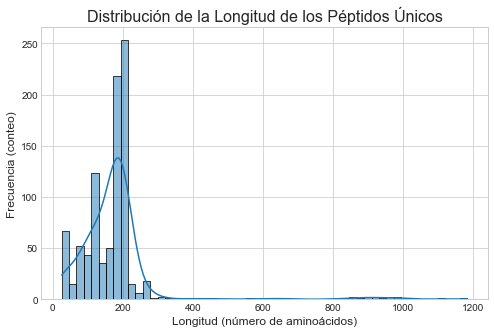

In [134]:
# Calcular la longitud de cada secuencia
df_peptidos_unicos['Longitud'] = df_peptidos_unicos['Secuencia'].apply(len)

# Mostrar estadísticas descriptivas de la longitud
print("Estadísticas de la Longitud de las Secuencias:")
print(df_peptidos_unicos['Longitud'].describe())

# Visualizar la distribución con un histograma
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 5))

sns.histplot(df_peptidos_unicos['Longitud'], kde=True, bins=55)

plt.title('Distribución de la Longitud de los Péptidos Únicos', fontsize=16)
plt.xlabel('Longitud (número de aminoácidos)', fontsize=12)
plt.ylabel('Frecuencia (conteo)', fontsize=12)
plt.show()

En este caso la distibucion de longitudes es bastante amplia, desde péptidos muy cortos (menos de 10 aminoácidos) hasta péptidos largos (más de 100 aminoácidos). La mayoría de los péptidos parecen estar en el rango de 20 a 60 aminoácidos, con un pico notable alrededor de los 30-40 aminoácidos. Esta variabilidad en la longitud puede influir en las propiedades físico-químicas y la actividad biológica de los péptidos, lo cual es importante considerar, algunos registros solo contienen el segmento activo del péptido

## 2. Análisis de Frecuencia de Aminoácidos

Cada aminoacido aporta diferentes propiedades fisicoquimica al peptido por lo que es importante conocer la cantidad de cada uno en la secuencia como se menciono en la seccion de analisi de 125 peptidos experientales

<ipython-input-135-6a36f1531831>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_frecuencia.index, y=df_frecuencia['Frecuencia'], palette='viridis_r', hue_order=df_frecuencia.index)


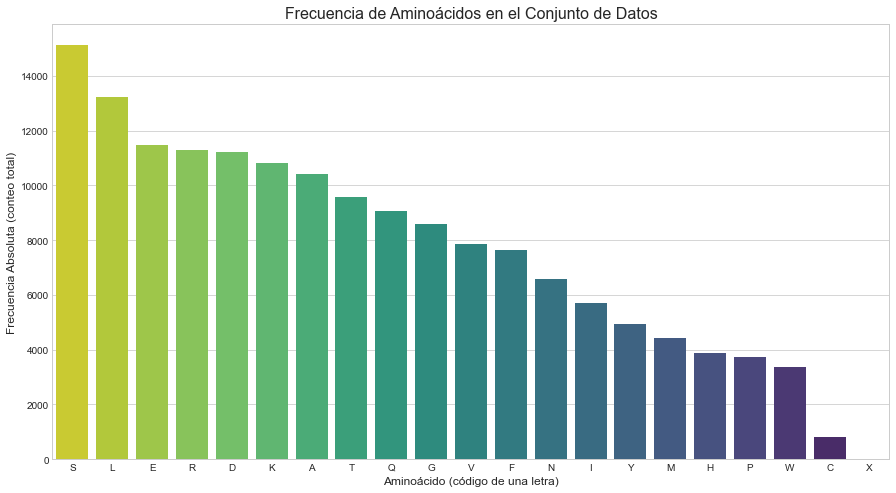

In [135]:
from collections import Counter

# --- Concatenar todas las secuencias en un solo string ---
todas_las_secuencias = "".join(df_peptidos_unicos['Secuencia'])

# --- Contar la frecuencia de cada aminoácido ---
frecuencia_aa = Counter(todas_las_secuencias)
df_frecuencia = pd.DataFrame.from_dict(frecuencia_aa, orient='index', columns=['Frecuencia'])
df_frecuencia = df_frecuencia.sort_values('Frecuencia', ascending=False)

# --- Visualizar las frecuencias con un gráfico de barras ---
plt.figure(figsize=(15, 8))
sns.barplot(x=df_frecuencia.index, y=df_frecuencia['Frecuencia'], palette='viridis_r', hue_order=df_frecuencia.index)

plt.title('Frecuencia de Aminoácidos en el Conjunto de Datos', fontsize=16)
plt.xlabel('Aminoácido (código de una letra)', fontsize=12)
plt.ylabel('Frecuencia Absoluta (conteo total)', fontsize=12)
plt.show()

### Catálogo de aminoácidos

| Símbolo | Aminoácido                                      |
|---------|-------------------------------------------------|
| A       | Alanine                                         |
| B       | Aspartic acid (D) or Asparagine (N)            |
| C       | Cysteine                                        |
| D       | Aspartic acid                                   |
| E       | Glutamic acid                                   |
| F       | Phenylalanine                                   |
| G       | Glycine                                         |
| H       | Histidine                                       |
| I       | Isoleucine                                      |
| J       | Leucine (L) or Isoleucine (I)                  |
| K       | Lysine                                          |
| L       | Leucine                                         |
| M       | Methionine / Start codon                        |
| N       | Asparagine                                      |
| O       | Pyrrolysine (rare)                              |
| P       | Proline                                         |
| Q       | Glutamine                                       |
| R       | Arginine                                        |
| S       | Serine                                          |
| T       | Threonine                                       |
| U       | Selenocysteine (rare)                           |
| V       | Valine                                          |
| W       | Tryptophan                                      |
| Y       | Tyrosine                                        |
| Z       | Glutamic acid (E) or Glutamine (Q)             |
| X       | Any                                             |
| *       | Translation stop                                |
| -       | Gap of indeterminate length                     |


## 3 Cálculo de propiedades físico-químicas

Algunas caracteristicas de los pepetidos pueden calcularse a partir de las secuencias de aminoacidos por lo que es posible usarlas para hacer el analisis exploratorio

In [136]:
def property_calculation (sequence: str) -> dict:
    """
    Calcula propiedades físico-químicas de una secuencia de aminoácidos.
    Devuelve None si la secuencia contiene caracteres no estándar (ej. 'X').
    """
    # Lista de aminoácidos estándar que ProtParam puede manejar
    aminoacidos_estandar = "ACDEFGHIKLMNPQRSTVWY"
    
    # Verificamos si hay caracteres no estándar en la secuencia
    if any(aa not in aminoacidos_estandar for aa in sequence):
        return {
            'peso_molecular': None,
            'punto_isoelectrico': None,
            'hidrofobicidad_gravy': None
        }
    
    try:
        analisis = ProteinAnalysis(sequence)
        return {
            'peso_molecular': analisis.molecular_weight(),
            'punto_isoelectrico': analisis.isoelectric_point(),
            'hidrofobicidad_gravy': analisis.gravy()
        }
    except Exception as e:
        print(f"No se pudo analizar la secuencia: {sequence[:30]}... Error: {e}")
        return {'peso_molecular': None, 'punto_isoelectrico': None, 'hidrofobicidad_gravy': None}


Iniciando el cálculo de propiedades físico-químicas...

 Propiedades calculadas y añadidas al DataFrame.
Primeras 5 filas del nuevo DataFrame:
                               ID  \
0            sp|P01275|GLUC_HUMAN   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM   

                                         Descripcion  \
0  sp|P01275|GLUC_HUMAN Pro-glucagon OS=Homo sapi...   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA Glucagon OS=Pan...   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN Glucagon OS=Pap...   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT Glucagon OS=Cer...   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM Glucagon OS=Ceb...   

                                           Secuencia  \
0  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
1  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
2  MQMSKVSGRGKSFVTKTHYLQMRNLYCQRNICEAKQSWRVYKSSAP...   
3  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSVSASQTDPLGDPDQ...   
4  MKSIYFVAGLFVML

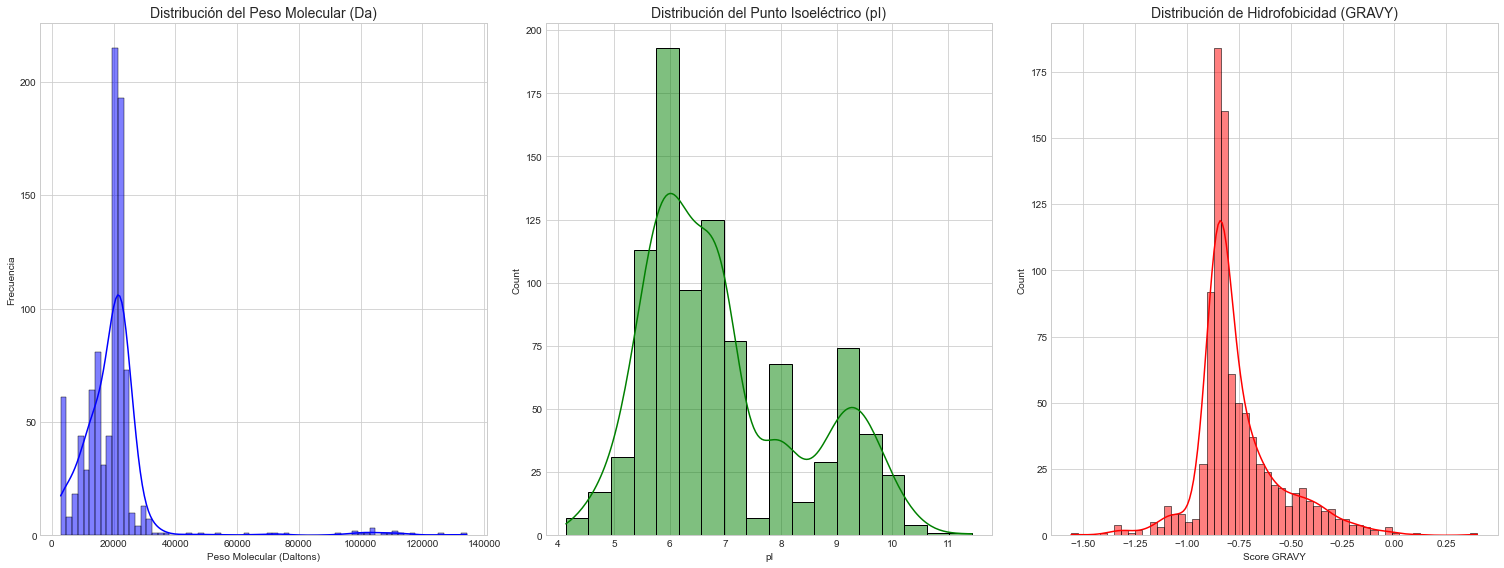


Resumen estadístico de las propiedades calculadas:
       peso_molecular  punto_isoelectrico  hidrofobicidad_gravy
count      921.000000          921.000000            921.000000
mean     19984.801100            6.944126             -0.755686
std      13963.694729            1.407308              0.202163
min       2877.160000            4.138413             -1.556944
25%      14051.446200            5.858190             -0.860199
50%      20872.961100            6.576749             -0.818889
75%      23174.664600            7.848268             -0.690449
max     134336.872000           11.429680              0.398714


In [137]:
print("Iniciando el cálculo de propiedades físico-químicas...")

propiedades_df = df_peptidos_unicos['Secuencia'].apply(lambda seq: pd.Series(property_calculation(seq)))


df_analisis = pd.concat([df_peptidos_unicos, propiedades_df], axis=1)

print("\n Propiedades calculadas y añadidas al DataFrame.")
print("Primeras 5 filas del nuevo DataFrame:")
print(df_analisis.head())


# distribución de nuevas propiedades
print("\n Generando visualizaciones de las nuevas propiedades...")

# estilo de los gráficos
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(21, 8))

# Histograma del Peso Molecular
sns.histplot(df_analisis['peso_molecular'].dropna(), kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribución del Peso Molecular (Da)', fontsize=14)
axes[0].set_xlabel('Peso Molecular (Daltons)')
axes[0].set_ylabel('Frecuencia')

# Histograma del Punto Isoeléctrico (pI)
sns.histplot(df_analisis['punto_isoelectrico'].dropna(), kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribución del Punto Isoeléctrico (pI)', fontsize=14)
axes[1].set_xlabel('pI')

# Histograma del Score GRAVY (Hidrofobicidad)
sns.histplot(df_analisis['hidrofobicidad_gravy'].dropna(), kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribución de Hidrofobicidad (GRAVY)', fontsize=14)
axes[2].set_xlabel('Score GRAVY')

plt.tight_layout()
plt.show()

# Resumen estadístico de las nuevas columnas
print("\nResumen estadístico de las propiedades calculadas:")
print(df_analisis[['peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy']].describe())


In [138]:
df_analisis.describe()


,Longitud,peso_molecular,punto_isoelectrico,hidrofobicidad_gravy
count,922.000000,921.000000,921.000000,921.000000
mean,173.290672,19984.801100,6.944126,-0.755686
std,122.502162,13963.694729,1.407308,0.202163
min,26.000000,2877.160000,4.138413,-1.556944
25%,122.000000,14051.446200,5.858190,-0.860199
50%,179.000000,20872.961100,6.576749,-0.818889
75%,201.000000,23174.664600,7.848268,-0.690449
max,1183.000000,134336.872000,11.429680,0.398714


In [139]:
df_analisis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    922 non-null    object 
 1   Descripcion           922 non-null    object 
 2   Secuencia             922 non-null    object 
 3   Archivo_origen        922 non-null    object 
 4   Longitud              922 non-null    int64  
 5   peso_molecular        921 non-null    float64
 6   punto_isoelectrico    921 non-null    float64
 7   hidrofobicidad_gravy  921 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 57.8+ KB


Como resultado se obtuvo un DataFrame con 921 registros únicos de péptidos, cada uno con su respectiva secuencia, longitud y propiedades físico-químicas calculadas (peso molecular, punto isoeléctrico e hidrofobicidad GRAVY). Este conjunto depurado y enriquecido de datos servirá como base para futuros análisis y modelados en el proyecto de descubrimiento de fármacos GLP-1.

## Mapa de calor con correlacion de las variables numéricas

El mapa de calor muestra las correlaciones entre las variables numéricas del DataFrame.

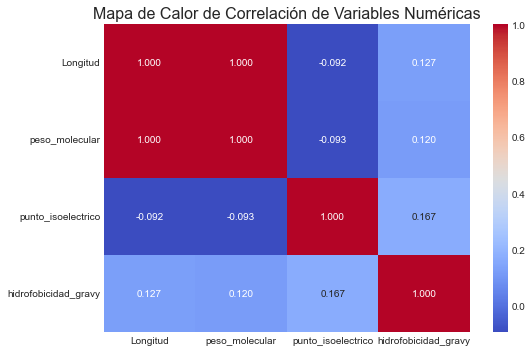

In [140]:

# solo las columnas numéricas para la correlación
columnas_numericas = ['Longitud', 'peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy']
df_analisis = df_analisis.dropna(subset=columnas_numericas)
df_numerico = df_analisis[columnas_numericas]

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Generar el mapa de calor
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_correlacion, 
            annot=True,      
            cmap='coolwarm',
            fmt=".3f")      

# título y gráfico
plt.title('Mapa de Calor de Correlación de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

Consistentemente con lo esperado, la longitud de la secuencia y el peso molecular están fuertemente correlacionados (0.96), ya que a mayor número de aminoácidos, mayor será el peso molecular del péptido.
lo que indica que el calculo de las propiedades es correcto y consistente con la bioquímica de los péptidos.

## Detección de anomalias en las secuencias de entrada

Un indicador importante de errores en las secuencias de aminoacidos es el numero de aminoacidos incosistente con los compuestos similares del conjunto de datos.
El boxplot de las propiedades identificadas nos permite detectar secuencias anomalas que es posible eliminar para mantener la consistencia en pasos posterioes

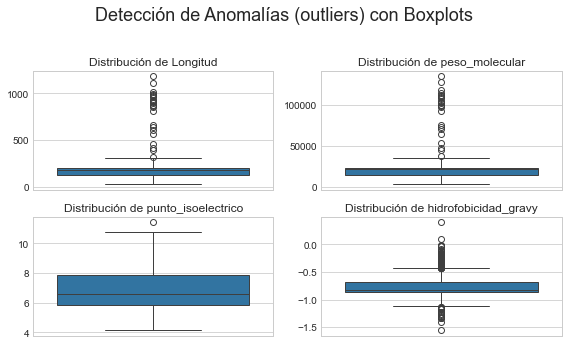

In [141]:
# Columnas numéricas a visualizar
columnas_numericas = ['Longitud', 'peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy']

fig, axes = plt.subplots(2, 2, figsize=(8, 5))
fig.suptitle('Detección de Anomalías (outliers) con Boxplots', fontsize=18)

# Aplanar el array de axes para iterar
axes = axes.flatten()

# Iterar sobre cada columna numérica y crear un boxplot en su respectivo subplot
for i, col in enumerate(columnas_numericas):
    sns.boxplot(y=df_analisis[col], ax=axes[i], orient='v')
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].set_ylabel('')

# layout y mostrar el gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

En este caso solo consideraremos la columna 'Longitud' para la detección de outliers. 

En el graficco se aprecian varios valores atípicos en la longitud de las secuencias, que podrian ser errores de secuenciación o cadenas incompletas que no son de utilidad para nuestro proyecto.


#### Analisis por archivo de origen de outliers en longitud de secuencias

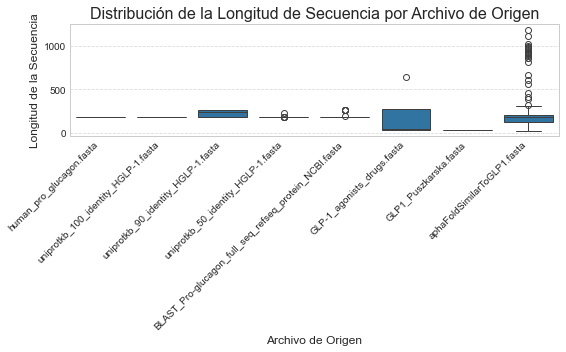

In [142]:
# 1. Crear la figura para el gráfico
plt.figure(figsize=(8, 5)) # Ajusta el tamaño según el número de categorías

# 2. Generar el boxplot
sns.boxplot(x='Archivo_origen', y='Longitud', data=df_analisis)

# 3. Mejorar la legibilidad del gráfico
plt.title('Distribución de la Longitud de Secuencia por Archivo de Origen', fontsize=16)
plt.xlabel('Archivo de Origen', fontsize=12)
plt.ylabel('Longitud de la Secuencia', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x para que no se solapen
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una rejilla para facilitar la lectura

# 4. Ajustar y mostrar el gráfico
plt.tight_layout()
plt.show()

El archivo de Alphafold tiene varios compuestos que hacen sospechar de anomalia, por lo que se eliminan del conjunto de datos.
En este momento no es posible determinar si las otras propiedades representan anomalias o caracteristicas esperadas de los pepitdos, por lo que se conservaran para su analisis


### Eliminar outliers de las secuencias por longitud
Para mantener un conjunto de datos limpio y útil, es importante los outliers o valores atípicos que pueden distorsionar los análisis estadísticos y los modelos predictivos.

In [143]:
out_dir = Path("../data/processed")
archivo_filtrado_fasta = out_dir/"secuencias_filtradas.fasta"

In [144]:

# Calcular el Rango Intercuartil (IQR) para la Longitud
Q1 = df_analisis['Longitud'].quantile(0.25)
Q3 = df_analisis['Longitud'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límite inferior para outliers: {limite_inferior}")
print(f"Límite superior para outliers: {limite_superior}\n")

# Filtrar el DataFrame y crear uno nuevo sin los outliers
df_filtrado = df_analisis[
    (df_analisis['Longitud'] >= limite_inferior) & 
    (df_analisis['Longitud'] <= limite_superior)
]

# Verificar el resultado
print(f"Tamaño del DataFrame original: {df_analisis.shape[0]} filas")
print(f"Tamaño del DataFrame nuevo (sin outliers): {df_filtrado.shape[0]} filas")
print(f"Se eliminaron {df_analisis.shape[0] - df_filtrado.shape[0]} filas.")


Límite inferior para outliers: 3.5
Límite superior para outliers: 319.5

Tamaño del DataFrame original: 921 filas
Tamaño del DataFrame nuevo (sin outliers): 897 filas
Se eliminaron 24 filas.


In [145]:
# Definir el nombre del archivo de salida
nombre_archivo_fasta = archivo_filtrado_fasta

df_filtrado['Fasta_Header'] = df_filtrado['ID'] + ' ' + df_filtrado['Descripcion'].copy().astype(str)

save_df_as_fasta(
    dataframe=df_filtrado,
    id_col='Fasta_Header',
    seq_col='Secuencia',
    output_file=archivo_filtrado_fasta
)

# Inspeccionar el archivo FASTA guardado
results = inspect_fasta_file(Path(archivo_filtrado_fasta), iupac=True, verbose=False)

if results and results['is_valid']:
    print(f"'{archivo_filtrado_fasta}' es válido.")
    print(f"Se encontraron {results['record_count']} registros válidos.")
else:
    print(f"\nLa validación falló para '{archivo_filtrado_fasta}'. Por favor, revisa los registros.")

Success! DataFrame has been saved to '..\data\processed\secuencias_filtradas.fasta'.
'..\data\processed\secuencias_filtradas.fasta' es válido.
Se encontraron 897 registros válidos.


<ipython-input-145-1b804393442a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Fasta_Header'] = df_filtrado['ID'] + ' ' + df_filtrado['Descripcion'].copy().astype(str)


### Resultado del análisis tras eliminar las secuencias inconsistentes

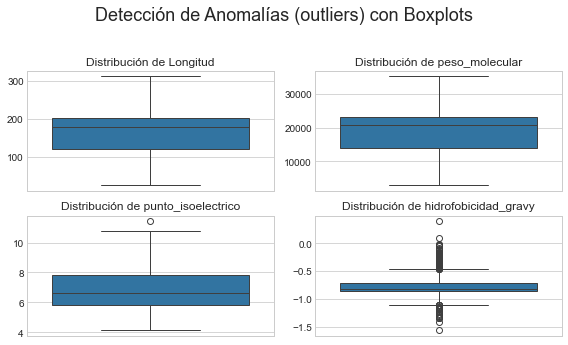

In [146]:
columnas_numericas = ['Longitud', 'peso_molecular', 'punto_isoelectrico', 'hidrofobicidad_gravy']

fig, axes = plt.subplots(2, 2, figsize=(8, 5))
fig.suptitle('Detección de Anomalías (outliers) con Boxplots', fontsize=18)

axes = axes.flatten()

for i, col in enumerate(columnas_numericas):
    sns.boxplot(y=df_filtrado[col], ax=axes[i], orient='v')
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].set_ylabel('') 

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

Se han eliminado los outliers y se ha guardado un nuevo archivo FASTA con las secuencias filtradas. El análisis y las visualizaciones se han actualizado para reflejar los datos sin outliers.

## Analísis de alineación de las secuencias de aminoácidos

El análisis de alineamiento de secuencias de aminoácidos facilita la búsqueda y clasificación de familias de péptidos, permite encontrar relaciones funcionales y evolutivas a partir de la secuencia de aminoacidos que componen un péptido

### Alienación de las secuencias con ClustalOmega

Clustal Omega es un programa informático ampliamente utilizado en bioinformática para realizar alineamientos de secuencias múltiples (MSA, por sus siglas en inglés). Fue desarrollado por la European Bioinformatics Institute (EBI) y es conocido por su capacidad para manejar grandes conjuntos de datos de secuencias de manera eficiente y precisa.   
El alineamiento de secuencias múltiples permite comparar y analizar varias secuencias simultáneamente. Utiliza algoritmos avanzados para alinear estas secuencias, identificando regiones conservadas y variaciones entre ellas. Esto es crucial para entender relaciones evolutivas, funciones biológicas y estructuras moleculares.

In [147]:
import os
import shutil

# agregar la ruta de Clustal Omega
ruta_clustal = r"D:\source\Proyecto Integrador\Libs\clustal-omega-1.2.2-win64"

# Agregar la ruta al PATH de la sesión actual
os.environ["PATH"] = ruta_clustal + os.pathsep + os.environ["PATH"]


# Verificar si clustalo.exe está en el PATH
clustal_path = shutil.which("clustalo.exe")
print("Ruta encontrada:", clustal_path if clustal_path else "No se encontró clustalo.exe")


Ruta encontrada: No se encontró clustalo.exe


In [148]:
#Ejecutar Clustal Omega para alinear las secuencias de aminoácidos
#  
archivo_entrada = archivo_filtrado_fasta
archivo_salida_alineamiento = out_dir / "alineamiento.clustal"

if run_clustal_omega(input_file=archivo_entrada, 
                       output_file=archivo_salida_alineamiento, 
                       threads=4):
    print(f"OK: Clustal Omega se ejecutó correctamente.")
    # You can now add the code to process the alignment file here
else:
    print(f"ERROR: Clustal Omega falló.")





Running Clustal Omega... (This may take a while)
ERROR: Executable 'clustalo.exe' not found.
Please ensure Clustal Omega is installed and accessible in your system's PATH.
ERROR: Clustal Omega falló.


In [149]:
from Bio import AlignIO

alineamiento = None

print(f"Cargar el archivo de alineamiento: '{archivo_salida_alineamiento}'")

try:
    # AlignIO para leer el archivo de alineamiento
    alineamiento = AlignIO.read(archivo_salida_alineamiento, "clustal")
    
    print("\nArchivo de alineamiento cargado exitosamente en la variable 'alineamiento'.")
    print("\nRESUMEN DEL ALINEAMIENTO ---")
    print(f"Número de secuencias alineadas: {len(alineamiento)}")
    print(f"Longitud del alineamiento (columnas): {alineamiento.get_alignment_length()}")

except FileNotFoundError:
    print(f"ERROR: No se encontró el archivo '{archivo_salida_alineamiento}'.")
    print("Asegúrate de haber ejecutado la Celda 1 exitosamente primero.")
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")

Cargar el archivo de alineamiento: '..\data\processed\alineamiento.clustal'

Archivo de alineamiento cargado exitosamente en la variable 'alineamiento'.

RESUMEN DEL ALINEAMIENTO ---
Número de secuencias alineadas: 897
Longitud del alineamiento (columnas): 768


## Mapa de calor de alineación de las secuencias

Con las secuencias alineadas, podemos identificar regiones conservadas y variables, lo que es importante para entender las relaciones evolutivas y funcionales entre los péptidos.
El mapa de calor de la matriz de distancia nos permite visualizar las similitudes y diferencias entre las secuencias alineadas, facilitando la identificación de patrones evolutivos y funcionales.
En este caso, las secuencias en amarillo no son relevantes para el análisis y se pueden eliminar, en la ingeniería de características posterior.

Calculando la matriz de frecuencia de aminoácidos por posición...
Matriz de frecuencias calculada.
Primeras 5 columnas de la matriz:
     1         2    3         4    5
A  0.0  0.111483  0.0  0.000000  0.0
B  0.0  0.000000  0.0  0.000000  0.0
C  0.0  0.111483  0.0  0.000000  0.0
D  0.0  0.000000  0.0  0.000000  0.0
E  0.0  0.000000  0.0  0.111483  0.0

Generando el heatmap de distribución de aminoácidos...


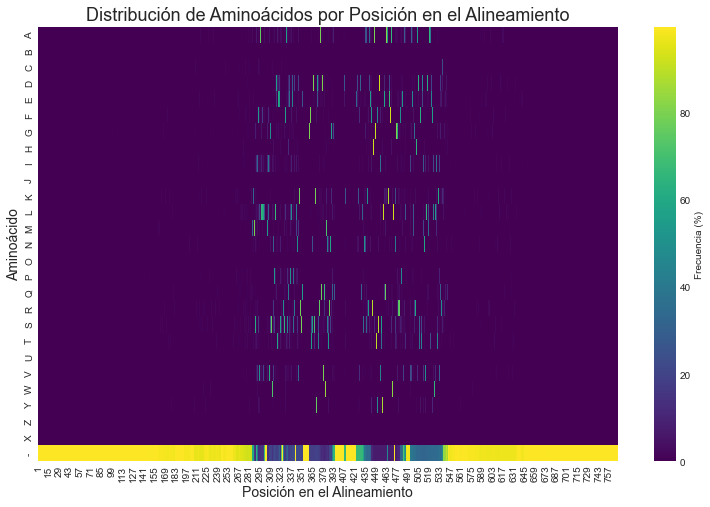

In [150]:
from collections import Counter


if alineamiento:
    print("Calculando la matriz de frecuencia de aminoácidos por posición...")

    # lista de aminoácidos estándar y la longitud del alineamiento
    aminoacidos = "ABCDEFGHIJKLMNOPQRSTUVWYZX-" # 20 AAs estándar + el gap '-'
    longitud_alineamiento = alineamiento.get_alignment_length()
    
    # Creamos un DataFrame vacío para almacenar las frecuencias
    #    Filas Aminoácidos 
    #    Columnas Posiciones del alineamiento
    df_frecuencias = pd.DataFrame(
        np.zeros((len(aminoacidos), longitud_alineamiento)), 
        index=list(aminoacidos), 
        columns=range(1, longitud_alineamiento + 1)
    )

    # llenado del DataFrame con los conteos de cada columna del alineamiento
    num_secuencias = len(alineamiento)
    for i in range(longitud_alineamiento):
        # Extraemos todos los caracteres de la columna 'i'
        columna = alineamiento[:, i]
        # Contamos cuántas veces aparece cada aminoácido en esa columna
        conteo_columna = Counter(columna)
        
        for aa, count in conteo_columna.items():
            if aa in df_frecuencias.index:
                # Calculamos la frecuencia como un porcentaje
                df_frecuencias.loc[aa, i + 1] = (count / num_secuencias) * 100

    print("Matriz de frecuencias calculada.")
    print("Primeras 5 columnas de la matriz:")
    print(df_frecuencias.iloc[:, :5].head())

    # Visualizar la matriz de frecuencias con un Heatmap
    print("\nGenerando el heatmap de distribución de aminoácidos...")
    
    plt.figure(figsize=(13, 8)) 

    sns.heatmap(df_frecuencias, cmap="viridis", cbar_kws={'label': 'Frecuencia (%)'})

    plt.title('Distribución de Aminoácidos por Posición en el Alineamiento', fontsize=18)
    plt.xlabel('Posición en el Alineamiento', fontsize=14)
    plt.ylabel('Aminoácido', fontsize=14)
    plt.show()

else:
    print("La variable 'alineamiento' no contiene datos. ejecutar la celda anterior exitosamente.")

### Resultado del analisis de alineamiento
El mapa de calor muestra la frecuencia relativa de cada aminoácido en cada posición del alineamiento múltiple. la ultima fila indica los gaps y posiciones sin aminoácidos. Las regiones en el interior de las secuencias indica que segmentos pudieran tener relación especifica para cada organismo.

### Analisis logo de la variabilidad de las secuencias
Este análisis permite ver graficamente le grado de variabilidad de las secuencias alineadas y detectar posiciones conservadas y variables en el alineamiento.

Generando el Sequence Logo...


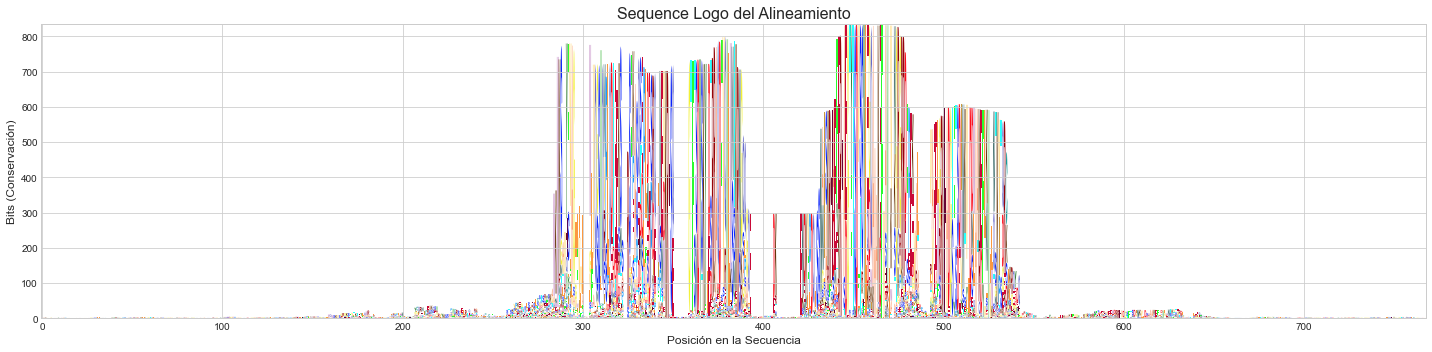

In [151]:
import logomaker
nombre_archivo_clustal =  archivo_salida_alineamiento

try:
    alineamiento = AlignIO.read(nombre_archivo_clustal, 'clustal')
    counts_df = logomaker.alignment_to_matrix(
        sequences=[str(rec.seq) for rec in alineamiento],
        to_type='counts'
    )
    if '-' in counts_df.columns:
        counts_df.drop('-', axis=1, inplace=True)
    
    datos_cargados = True
except Exception as e:
    print(f"Error al cargar o procesar el archivo: {e}")
    datos_cargados = False


def generar_sequence_logo(df_conteos):
    """
    Genera y muestra un Sequence Logo a partir de un DataFrame de conteos.
    """
    print("Generando el Sequence Logo...")
    
    # Crear la figura y los ejes para tener control total
    fig, ax = plt.subplots(1, 1, figsize=(20, 5))

    # Crear el objeto Logo en los ejes especificados
    logo = logomaker.Logo(df_conteos,
                          ax=ax,
                          font_name='Arial',
                          color_scheme='skylign_protein')

    # Configurar títulos y etiquetas en los ejes
    ax.set_title('Sequence Logo del Alineamiento', fontsize=16)
    ax.set_xlabel('Posición en la Secuencia', fontsize=12)
    ax.set_ylabel('Bits (Conservación)', fontsize=12)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
    
    # 5. Cerrar la figura para evitar que se vuelva a mostrar
    plt.close(fig)

# LLAMAR A LA FUNCIÓN PARA CREAR EL GRÁFICO ---
# Solo se ejecuta si los datos se cargaron correctamente
if datos_cargados:
    generar_sequence_logo(counts_df)

## Identificacion de las secuencias activas del péptido

### Integrar todos los datos conocidos en un unico dataframe

#### Extraer las secciones activas de los peptidos

In [152]:
import pandas as pd
from Bio import AlignIO

# --- CONFIGURACIÓN ---
# 1. Nombre de tu archivo de alineamiento
nombre_archivo_clustal = archivo_salida_alineamiento

# 2. Nombre del archivo CSV de salida donde se guardarán los resultados
nombre_archivo_salida_csv = out_dir/'secuencias_activas_extraidas.csv'

# 3. Secuencias de referencia (las porciones activas que buscamos)
secuencia_ref_glp1 = "HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR"
                     #HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR

# 4. ID de secuencia de referencia humana en el archivo clustal
#    (Puede ser 'sp|P01275|GCG_HUMAN' o algo similar, revísalo en tu archivo)
id_referencia_humana = 'sp|P01275|GLUC_HUMAN' 


# --- SCRIPT DE EXTRACCIÓN ---
try:
    # Cargar el alineamiento
    if alineamiento is None:
     alineamiento = AlignIO.read(nombre_archivo_clustal, 'clustal')
    
    # Encontrar la secuencia de referencia en el alineamiento
    ref_record = None
    for record in alineamiento:
        if record.id == id_referencia_humana:
            ref_record = record
            break
            
    if ref_record is None:
        raise ValueError(f"No se encontró la secuencia de referencia con el ID: {id_referencia_humana}")

    # Función para encontrar los índices de inicio/fin de un segmento en el alineamiento
    def encontrar_indices_segmento(secuencia_alineada, segmento_sin_gaps):
        sec_sin_gaps = secuencia_alineada.replace('-', '')
        start_index_sin_gaps = sec_sin_gaps.find(segmento_sin_gaps)
        
        if start_index_sin_gaps == -1:
            return None, None

        # Mapear los índices sin gaps de vuelta a los índices con gaps del alineamiento
        pos_sin_gaps = 0
        start_alineado = -1
        
        for i, char in enumerate(secuencia_alineada):
            if pos_sin_gaps == start_index_sin_gaps and start_alineado == -1:
                start_alineado = i
            if char != '-':
                pos_sin_gaps += 1
            if pos_sin_gaps == start_index_sin_gaps + len(segmento_sin_gaps):
                end_alineado = i + 1
                return start_alineado, end_alineado
        return None, None

    # Encontrar los límites para GLP-1
    start_glp1, end_glp1 = encontrar_indices_segmento(str(ref_record.seq), secuencia_ref_glp1)

    if start_glp1 is None:
        raise ValueError("No se pudieron localizar los segmentos de referencia en la secuencia humana.")

    # Extraer los segmentos de todas las secuencias
    resultados = []
    for record in alineamiento:
        segmento_glp1 = str(record.seq)[start_glp1:end_glp1].replace('-', '') # Guardar sin gaps
        resultados.append({
            'ID': record.id,
            'Secuencia_Completa': str(record.seq).replace('-', ''),
            'GLP-1_Activo': segmento_glp1,
        })

    # Guardar los resultados en un DataFrame y luego en un archivo CSV
    df_secuencias_activas = pd.DataFrame(resultados)
    print("\nVista previa de los resultados:")
    print(df_secuencias_activas.head())

except Exception as e:
    print(f"Ocurrió un error: {e}")



Vista previa de los resultados:
                               ID  \
0            sp|P01275|GLUC_HUMAN   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM   

                                  Secuencia_Completa  \
0  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
1  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
2  MQMSKVSGRGKSFVTKTHYLQMRNLYCQRNICEAKQSWRVYKSSAP...   
3  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSVSASQTDPLGDPDQ...   
4  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQTDPLSDPDQ...   

                     GLP-1_Activo  
0  HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR  
1  HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR  
2  HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR  
3  HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR  
4  HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR  


In [153]:
df_secuencias_activas

,ID,Secuencia_Completa,GLP-1_Activo
0,sp|P01275|GLUC_HUMAN,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR
1,tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR
2,tr|A0A096MTV1|A0A096MTV1_PAPAN,MQMSKVSGRGKSFVTKTHYLQMRNLYCQRNICEAKQSWRVYKSSAP...,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR
3,tr|A0A2K5LPY8|A0A2K5LPY8_CERAT,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSVSASQTDPLGDPDQ...,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR
4,tr|A0A2K5SE38|A0A2K5SE38_CEBIM,MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQTDPLSDPDQ...,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR
...,...,...,...
892,AF-A0A1S3MHE1-F1,MCGSVWCLLLLLLCPGTDEMVLEDKALASQSGWRTYELQKGQNGIN...,HSDGTFTNDYTHYLDKIKAKDFVQWLASTK
893,AF-A0A3Q0ST55-F1,MKSIHSLAGILLVLGFVQSSWQVPVHDDSLRSEMERRGETFNKRHV...,
894,AF-A0A4W5QQA8-F1,MFGIHTLAGVLLLVIVQSSWQVPLEAEDTSSLETADSLLEDLRGVS...,NSEAIFSDVSTYLLDQAAKDFVSWLKSGP
895,AF-A0A3B3CKX7-F1,MKIIMWCTLLLFLCSTTKEMVLDQTKQGLTAEMKSGLNISRNLKRH...,HSDGMFTSDLTNYLDKIKAKNFVEWLAAIK


In [154]:
# --- 1. Verificación ANTES de la limpieza ---
print("--- ANTES DE LA LIMPIEZA ---")
nulos_antes = df_secuencias_activas['GLP-1_Activo'].isnull().sum()
# Convertimos temporalmente a string para poder usar .str.strip() de forma segura
vacios_antes = (df_secuencias_activas['GLP-1_Activo'].astype(str).str.strip() == '').sum()
print(f"Valores nulos (NaN) encontrados: {nulos_antes}")
print(f"Cadenas de texto vacías encontradas: {vacios_antes}")


# --- 2. Proceso de limpieza en dos pasos ---

# Paso A: Reemplazar todas las celdas con espacios o vacías por un NaN estándar.
# La expresión regular r'^\s*$' encuentra cadenas que solo contienen espacios.
df_secuencias_activas['GLP-1_Activo'] = df_secuencias_activas['GLP-1_Activo'].replace(r'^\s*$', np.nan, regex=True)

# Paso B: Rellenar TODOS los NaN (los originales y los recién creados)
# con los valores de la columna 'Secuencia_Completa'.
df_secuencias_activas['GLP-1_Activo'] = df_secuencias_activas['GLP-1_Activo'].fillna(df_secuencias_activas['Secuencia_Completa'])


# --- 3. Verificación DESPUÉS de la limpieza ---
print("\n--- DESPUÉS DE LA LIMPIEZA ---")
nulos_despues = df_secuencias_activas['GLP-1_Activo'].isnull().sum()
vacios_despues = (df_secuencias_activas['GLP-1_Activo'].astype(str).str.strip() == '').sum()
print(f"Valores nulos (NaN) encontrados: {nulos_despues}")
print(f"Cadenas de texto vacías encontradas: {vacios_despues}")

df_secuencias_activas.to_csv(nombre_archivo_salida_csv, index=False)   
print(f"¡Éxito! Se han extraído las porciones activas y guardado en '{nombre_archivo_salida_csv}'.")

print("\nVista previa del DataFrame final y limpio:")
print(df_secuencias_activas.head())

--- ANTES DE LA LIMPIEZA ---
Valores nulos (NaN) encontrados: 0
Cadenas de texto vacías encontradas: 61

--- DESPUÉS DE LA LIMPIEZA ---
Valores nulos (NaN) encontrados: 0
Cadenas de texto vacías encontradas: 0
¡Éxito! Se han extraído las porciones activas y guardado en '..\data\processed\secuencias_activas_extraidas.csv'.

Vista previa del DataFrame final y limpio:
                               ID  \
0            sp|P01275|GLUC_HUMAN   
1  tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA   
2  tr|A0A096MTV1|A0A096MTV1_PAPAN   
3  tr|A0A2K5LPY8|A0A2K5LPY8_CERAT   
4  tr|A0A2K5SE38|A0A2K5SE38_CEBIM   

                                  Secuencia_Completa  \
0  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
1  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQADPLSDPDQ...   
2  MQMSKVSGRGKSFVTKTHYLQMRNLYCQRNICEAKQSWRVYKSSAP...   
3  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSVSASQTDPLGDPDQ...   
4  MKSIYFVAGLFVMLVQGSWQRSLQDTEEKSRSFSASQTDPLSDPDQ...   

                     GLP-1_Activo  
0  HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR  


## Agregar los datos de identificacion de origen

Unir los archivos CSV con informacion de identificadores y secuencias

In [155]:
glucagon_search = directorio_base/"glucagon-results-csv.csv"
pro_glucagon_search = directorio_base/"Pro-glucagon-results-csv.csv"
gluc_protein_search = directorio_base/"GLUC_protein-results-csv.csv"

In [156]:
import pandas as pd
from pathlib import Path

# 1. Archivos a cargar
archivos_csv = [
    directorio_base / "glucagon-results-csv.csv",
    directorio_base / "Pro-glucagon-results-csv.csv",
    directorio_base / "GLUC_protein-results-csv.csv",
    directorio_base / "Preproglucagon-results-csv.csv",
    directorio_base / 'Glucagon-1-results-csv.csv'    
]

# 2. Leer, combinar y limpiar duplicados
df_busqueda_ids = pd.concat([pd.read_csv(f) for f in archivos_csv if f.exists()], ignore_index=True)
df_busqueda_ids = df_busqueda_ids.drop_duplicates(subset=["modelEntityId"], keep="first")

# 3. Renombrar columnas
df_busqueda_ids = df_busqueda_ids.rename(columns={
    "modelEntityId": "ID",
    "Target sequence": "sequence",
    "organismScientificNameT": "Species",
    "uniprotDescription": "Description",
})

# 4. Conversión de tipos
columnas_string = [
    "ID","gene","sequenceChecksum","uniprotAccession","uniprotId",
    "Description","Species","sequence","organismCommonNames",
    "latestVersion","allVersions","_version_","geneSynonyms","proteinFullNames"
]
df_busqueda_ids[columnas_string] = df_busqueda_ids[columnas_string].astype("string")

df_busqueda_ids[["sequenceVersionDate", "modelCreatedDate"]] = df_busqueda_ids[["sequenceVersionDate", "modelCreatedDate"]].apply(pd.to_datetime)

# 5. Verificación final
df_busqueda_ids.info()
display(df_busqueda_ids.head(2))


<class 'pandas.core.frame.DataFrame'>
Index: 2010 entries, 0 to 2016
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   ID                          2010 non-null   string             
 1   gene                        1552 non-null   string             
 2   isUniProtReferenceProteome  2010 non-null   bool               
 3   isUniProtReviewed           2010 non-null   bool               
 4   sequenceChecksum            2010 non-null   string             
 5   sequenceVersionDate         2010 non-null   datetime64[ns, UTC]
 6   uniprotAccession            2010 non-null   string             
 7   uniprotId                   2010 non-null   string             
 8   Description                 2010 non-null   string             
 9   taxId                       2010 non-null   int64              
 10  organismScientificName      2010 non-null   object             
 

,ID,gene,isUniProtReferenceProteome,isUniProtReviewed,sequenceChecksum,sequenceVersionDate,uniprotAccession,uniprotId,Description,taxId,...,sequence,modelCreatedDate,organismCommonNames,latestVersion,allVersions,Species,_version_,geneSynonyms,proteinFullNames,proteinShortNames
0,AF-P47871-F1,GCGR,True,True,ADBB477C6267AE6E,1996-02-01 00:00:00+00:00,P47871,GLR_HUMAN,Glucagon receptor,9606,...,MPPCQPQRPLLLLLLLLACQPQVPSAQVMDFLFEKWKLYGDQCHHN...,2022-06-01 00:00:00+00:00,Human,4,"1,2,3,4",Homo sapiens,1839060440805539840,<NA>,<NA>,NaN
1,AF-Q61606-F1,Gcgr,True,True,578EB30BF281E67A,2011-07-27 00:00:00+00:00,Q61606,GLR_MOUSE,Glucagon receptor,10090,...,MPLTQLHCPHLLLLLLVLSCLPEAPSAQVMDFLFEKWKLYSDQCHH...,2022-06-01 00:00:00+00:00,Mouse,4,"1,2,3,4",Mus musculus,1838994854438240258,<NA>,<NA>,NaN


In [157]:
# Renombramos la columna clave en df_alphafold para que coincida con la de df_resultante
# Asumiremos que la columna clave en df_resultante es 'uniprotAccession'
df_alphafold_renombrado = df_alphafold.drop_duplicates(subset=['AFDB accession']).rename(columns={
    'AFDB accession': 'ID',
    'Target sequence': 'sequence',
    'organismScientificName': 'Species',
    'uniprotDescription' : 'Description'
})

columnas_string = [
    "ID"
    ,"Description"
    ,"Species"
    ,"sequence"
    ,"Positives Matches"
    ,"Query"
    ,"Gaps"
    ]

df_alphafold_renombrado[columnas_string] = df_alphafold_renombrado[columnas_string].astype("string")

df_alphafold_renombrado.info()
display(df_alphafold_renombrado.head())

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 0 to 1943
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        927 non-null    string 
 1   Description               927 non-null    string 
 2   Species                   927 non-null    string 
 3   Average pLDDT (target)    927 non-null    float64
 4   Sequence length (target)  927 non-null    int64  
 5   sequence                  927 non-null    string 
 6   Positives Matches         927 non-null    string 
 7   Sequence Identity         927 non-null    int64  
 8   E-value                   927 non-null    float64
 9   HSP score                 927 non-null    int64  
 10  Query                     927 non-null    string 
 11  Gaps                      927 non-null    string 
dtypes: float64(2), int64(3), string(7)
memory usage: 94.1 KB


,ID,Description,Species,Average pLDDT (target),Sequence length (target),sequence,Positives Matches,Sequence Identity,E-value,HSP score,Query,Gaps
0,AF-Q6PPF4-F1,Glucagon,Capra hircus,72.88,45,NNIAKRHDEFERHAEGTFTSDVSSYLEGQAAKEFIAWLVKGRGRR,30/30 (100%),30,5.387230e-13,155,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)
1,AF-U3KRF3-F1,Liraglutide,Saccharomyces cerevisiae,76.06,31,HAEGTFTSDVSSYLEGQAAKEFIAWLVRGRG,30/30 (100%),29,1.208460e-12,152,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)
2,AF-A0A1L7NR18-F1,Glucagon,Felis catus,64.88,123,HSQGTFTSDYSKYLDSRRAQDFVQWLMNTKRNKNNIAKRHDEFERH...,30/30 (100%),30,3.516260e-12,155,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)
3,AF-A0A2F0BJC2-F1,Glucagon,Eschrichtius robustus,67.12,148,SFPAPQTDPLNDPDQMNEDKRHSQGTFTSDYSKYLDSRRAQDFVQW...,30/30 (100%),30,6.032010e-12,155,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)
4,AF-A0A091DI12-F1,Glucagon,Fukomys damarensis,66.31,159,MYIAPIAIFHRSFSASQTELPDDPDQMNEDKRHSQGTFTSDYSKYL...,30/30 (100%),30,7.500020e-12,155,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,0/30 (0%)


In [158]:
# Unir los DataFrames usando un 'outer join' para mantener todos los registros
df_unido = pd.merge(
    df_busqueda_ids,
    df_alphafold_renombrado,
    on='ID',  
    how='outer',
    suffixes=('_original', '_alphafold') # Sufijos para columnas con el mismo nombre
)

print(f"Tamaño después de la unión externa: {df_unido.shape}")

# Lista de columnas a actualizar/rellenar
# (columna_en_df_original, columna_de_donde_tomar_datos)
columnas_a_actualizar = {
    'sequence_original': 'sequence_alphafold',
    'Species_original': 'Species_alphafold',
    'Description_original': 'Description_alphafold'
    # Agrega aquí otras parejas de columnas que quieras actualizar
    # 'nombre_columna_original': 'nombre_columna_alphafold'
}

# Iterar y rellenar los valores nulos
for col_orig, col_alpha in columnas_a_actualizar.items():
    if col_orig in df_unido.columns and col_alpha in df_unido.columns:
        # Rellena los NaN en la columna original con valores de la columna de alphafold
        df_unido[col_orig].fillna(df_unido[col_alpha], inplace=True)

# Limpiar el DataFrame final
# Eliminar las columnas auxiliares de alphafold que ya no son necesarias
columnas_a_eliminar = list(columnas_a_actualizar.values())
df_busqueda_final = df_unido.drop(columns=columnas_a_eliminar, errors='ignore')

# Renombrar las columnas originales para quitar el sufijo '_original'
df_busqueda_final.rename(columns=lambda c: c.replace('_original', ''), inplace=True)
df_busqueda_final = df_busqueda_final.drop_duplicates(subset=['ID']).rename(columns={'sequence': 'Secuencia_Completa', 'ID': 'ID_Accession'})

# Verificación Final
print("\n--- ¡Proceso de Unión y Actualización Completado! ---")
print("\nVista previa del resultado final:")
print(df_busqueda_final.head())
print("\nInformación del DataFrame final:")
df_busqueda_final.info()

Tamaño después de la unión externa: (2210, 35)

--- ¡Proceso de Unión y Actualización Completado! ---

Vista previa del resultado final:
       ID_Accession               gene isUniProtReferenceProteome  \
0  AF-A0A060VPW7-F1  GSONMT00066509001                       True   
1  AF-A0A060VXS0-F1               <NA>                        NaN   
2  AF-A0A060VY52-F1               <NA>                        NaN   
3  AF-A0A060WDT4-F1  GSONMT00072971001                       True   
4  AF-A0A060WZ32-F1  GSONMT00049393001                       True   

  isUniProtReviewed  sequenceChecksum       sequenceVersionDate  \
0             False  365DA57E1BC6E68D 2014-09-03 00:00:00+00:00   
1               NaN              <NA>                       NaT   
2               NaN              <NA>                       NaT   
3             False  748AF6DB21987527 2014-09-03 00:00:00+00:00   
4             False  D5C346BBA0E9D2E3 2014-09-03 00:00:00+00:00   

  uniprotAccession         uniprotId         

<ipython-input-158-e997dffaaa9a>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_unido[col_orig].fillna(df_unido[col_alpha], inplace=True)


In [159]:
# Primer Intento: Unir por ID
#    Usamos un 'left' merge para mantener todas las filas de tu DataFrame principal.
df_unido_por_id = pd.merge(
    df_secuencias_activas,
    df_busqueda_final,
    left_on='ID',
    right_on='ID_Accession',
    how='left'
)

# Contar cuántos se unieron exitosamente por ID
coincidencias_por_id = df_unido_por_id['ID_Accession'].notna().sum()
print(f"Paso 1: Se encontraron {coincidencias_por_id} coincidencias usando el ID.")

# 2. Segundo Intento: Unir por Secuencia Completa
#    Hacemos un segundo merge, pero esta vez usando la secuencia como llave.
df_unido_por_secuencia = pd.merge(
    df_secuencias_activas,
    df_busqueda_final,
    left_on='Secuencia_Completa',
    right_on='Secuencia_Completa',
    how='left'
)

coincidencias_por_secuencia = df_unido_por_secuencia['ID_Accession'].notna().sum()
print(f"Paso 2: Se encontraron {coincidencias_por_secuencia} coincidencias usando la Secuencia.")


# 3. Combinar los Resultados
#    Usamos .combine_first() para rellenar los vacíos del primer merge (por ID)
#    con los resultados del segundo merge (por secuencia).
#    Para que funcione bien, establecemos el ID como índice temporalmente.
df_etiquetas_glucagon = df_unido_por_id.set_index('ID').combine_first(df_unido_por_secuencia.set_index('ID')).reset_index().drop_duplicates(subset=['Secuencia_Completa'])
df_etiquetas_glucagon.drop(columns=['Secuencia_Completa_x','Secuencia_Completa_y'], inplace=True, errors='ignore')

# 4. Verificación Final
print("\n--- ¡Proceso de Unión Completado! ---")
print(f"El DataFrame final tiene la forma: {df_etiquetas_glucagon.shape}")
print("\nColumnas del DataFrame final:")
print(df_etiquetas_glucagon.info())

print("\nVista previa del resultado final:")
print(df_etiquetas_glucagon.head())

Paso 1: Se encontraron 745 coincidencias usando el ID.
Paso 2: Se encontraron 904 coincidencias usando la Secuencia.

--- ¡Proceso de Unión Completado! ---
El DataFrame final tiene la forma: (897, 34)

Columnas del DataFrame final:
<class 'pandas.core.frame.DataFrame'>
Index: 897 entries, 0 to 1002
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   ID                          897 non-null    object             
 1   Average pLDDT (target)      798 non-null    float64            
 2   Description                 798 non-null    string             
 3   E-value                     798 non-null    float64            
 4   GLP-1_Activo                897 non-null    object             
 5   Gaps                        798 non-null    string             
 6   HSP score                   798 non-null    float64            
 7   ID_Accession                798 non-null 

Integrar, la descripcion de los datos faltantes de los archivos fasta

In [160]:
# --- 1. Verificación ANTES del proceso ---
nulos_antes = df_etiquetas_glucagon['Description'].isnull().sum()
print(f"Valores nulos en 'Description' ANTES del proceso: {nulos_antes}")

# --- 2. Crear el mapa de ID -> Descripcion desde df_peptidos_unicos ---
mapa_descripcion = df_peptidos_unicos.set_index('ID')['Descripcion']

# --- 3. Rellenar los valores nulos en la columna 'Description' ---
# Usamos .fillna() con el resultado de mapear los IDs
df_etiquetas_glucagon['Description'] = df_etiquetas_glucagon['Description'].fillna(
    df_etiquetas_glucagon['ID'].map(mapa_descripcion)
)

# --- 4. Verificación DESPUÉS del proceso ---
nulos_despues = df_etiquetas_glucagon['Description'].isnull().sum()
print(f"\nValores nulos en 'Description' DESPUÉS del proceso: {nulos_despues}")

# Mostrar una vista previa del DataFrame actualizado
print("\nVista previa de df_etiquetas_glucagon con la descripción actualizada:")
print(df_etiquetas_glucagon[['ID', 'Description']].head())

Valores nulos en 'Description' ANTES del proceso: 99

Valores nulos en 'Description' DESPUÉS del proceso: 0

Vista previa de df_etiquetas_glucagon con la descripción actualizada:
                 ID                         Description
0  AF-A0A060VXS0-F1             Uncharacterized protein
1  AF-A0A060VY52-F1             Uncharacterized protein
2  AF-A0A060WDT4-F1  GLUCAGON domain-containing protein
3  AF-A0A087VEU7-F1                            Glucagon
4  AF-A0A087XPV4-F1                            Glucagon


In [161]:
# Definir el nombre del archivo de salida
nombre_archivo_salida = out_dir/'glucagon_like_peptides.csv'

# Guardar el DataFrame en formato CSV
# Se usa index=False para evitar que se guarde el índice del DataFrame como una columna
df_etiquetas_glucagon.to_csv(nombre_archivo_salida, index=False)

print(f"¡Éxito! El DataFrame se ha guardado correctamente en el archivo '{nombre_archivo_salida}'.")

¡Éxito! El DataFrame se ha guardado correctamente en el archivo '..\data\processed\glucagon_like_peptides.csv'.


In [162]:
def guardar_df_en_fasta(dataframe, id_col, seq_col, filename):
    """
    Guarda las columnas especificadas de un DataFrame en un archivo FASTA.

    Args:
        dataframe (pd.DataFrame): El DataFrame que contiene los datos.
        id_col (str): El nombre de la columna para el encabezado FASTA.
        seq_col (str): El nombre de la columna para la secuencia.
        filename (str): El nombre del archivo de salida.
    """
    try:
        with open(filename, 'w') as archivo_fasta:
            # Iterar sobre cada fila del DataFrame
            for index, row in dataframe.iterrows():
                identificador = row[id_col]
                secuencia = row[seq_col]

                # Asegurarse de que la secuencia no sea nula antes de escribir
                if pd.notna(secuencia) and secuencia:
                    # Escribir la cabecera y la secuencia en el archivo
                    archivo_fasta.write(f">{identificador}\n")
                    archivo_fasta.write(f"{secuencia}\n")
        
        print(f"¡Éxito! Se ha guardado el archivo '{filename}'.")

    except KeyError as e:
        print(f"Error: No se encontró la columna {e}. Revisa los nombres de las columnas.")
    except Exception as e:
        print(f"Ocurrió un error inesperado: {e}")




In [163]:
# --- Usar la función para crear los dos archivos ---

# 1. Guardar las secuencias de 'GLP-1_Activo'
guardar_df_en_fasta(
    dataframe=df_etiquetas_glucagon,
    id_col='ID',
    seq_col='GLP-1_Activo',
    filename=out_dir/'GLP-1_Activo.fasta'
)

# 2. Guardar las secuencias de 'Secuencia_Completa'
guardar_df_en_fasta(
    dataframe=df_etiquetas_glucagon,
    id_col='ID',
    seq_col='Secuencia_Completa',
    filename=out_dir/'Secuencia_Completa.fasta'
)

¡Éxito! Se ha guardado el archivo '..\data\processed\GLP-1_Activo.fasta'.
¡Éxito! Se ha guardado el archivo '..\data\processed\Secuencia_Completa.fasta'.


## analisis de las secuencias seleccionadas para verificar similitudes con GLP-1

In [164]:
from pathlib import Path
from Bio import pairwise2
from Bio.Align import substitution_matrices
# ruta del directorio del notebook actual
notebook_dir = Path.cwd()

# Subir un nivel para llegar a la carpeta raíz del proyecto
project_root = notebook_dir.parent

# Añadir la carpeta raíz al path de Python
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    print(f"Ruta del proyecto añadida al path: {project_root}")

# --- Ahora puedes importar tus funciones sin problemas ---
from src.bio_secc import analyze_peptide_candidates
from src.bio_secc import analyze_peptide_extended
resultados = analyze_peptide_candidates(
    aln_path= archivo_salida_alineamiento,
    ref_id='sp|P01275|GLUC_HUMAN',
    peptide= "HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR"
)

# Mostrar los resultados


df_results_peptide_candidates = pd.DataFrame(resultados)

df_results_peptide_candidates
CRITICAL_POSITIONS = [1, 5, 6, 9, 14, 22, 26, 27, 29]

results_peptide_extended = analyze_peptide_extended(
    aln_path= archivo_salida_alineamiento
    ,ref_id='sp|P01275|GLUC_HUMAN'
    ,peptide= "HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR"    
    ,critical_positions = CRITICAL_POSITIONS   )

df_results_peptide_candidates = pd.DataFrame(results_peptide_extended)
df_results_peptide_candidates

Péptido encontrado en la secuencia sin huecos de la referencia en posiciones 97..126 (0-based). Longitud 30 aa
Se corresponde con 30 columnas del alineamiento (índices 444..475)

Top candidatos:
tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA ID%: 100.00  B62_norm:+5.17  compared:30  EXACTO
tr|A0A096MTV1|A0A096MTV1_PAPAN ID%: 100.00  B62_norm:+5.17  compared:30  EXACTO
tr|A0A2K5LPY8|A0A2K5LPY8_CERAT ID%: 100.00  B62_norm:+5.17  compared:30  EXACTO
tr|A0A2K5SE38|A0A2K5SE38_CEBIM ID%: 100.00  B62_norm:+5.17  compared:30  EXACTO
tr|A0A2K5WWG8|A0A2K5WWG8_MACFA ID%: 100.00  B62_norm:+5.17  compared:30  EXACTO
tr|A0A2K6QY03|A0A2K6QY03_RHIRO ID%: 100.00  B62_norm:+5.17  compared:30  EXACTO
tr|F7ID40|F7ID40_CALJA         ID%: 100.00  B62_norm:+5.17  compared:30  EXACTO
tr|A0A8C9ICK2|A0A8C9ICK2_9PRIM ID%: 100.00  B62_norm:+5.17  compared:30  EXACTO
sp|P01272|GLUC_BOVIN           ID%: 100.00  B62_norm:+5.17  compared:30  EXACTO
sp|P01274|GLUC_PIG             ID%: 100.00  B62_norm:+5.17  compared:30  EXACTO
sp|P2

,id,region,percent_identity,blosum62_norm,critical
0,tr|A0A2R8ZHC5|A0A2R8ZHC5_PANPA,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,100.0,5.166667,"{1: 'Y', 5: 'Y', 6: 'Y', 9: 'Y', 14: 'Y', 22: ..."
1,tr|A0A096MTV1|A0A096MTV1_PAPAN,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,100.0,5.166667,"{1: 'Y', 5: 'Y', 6: 'Y', 9: 'Y', 14: 'Y', 22: ..."
2,tr|A0A2K5LPY8|A0A2K5LPY8_CERAT,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,100.0,5.166667,"{1: 'Y', 5: 'Y', 6: 'Y', 9: 'Y', 14: 'Y', 22: ..."
3,tr|A0A2K5SE38|A0A2K5SE38_CEBIM,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,100.0,5.166667,"{1: 'Y', 5: 'Y', 6: 'Y', 9: 'Y', 14: 'Y', 22: ..."
4,tr|A0A2K5WWG8|A0A2K5WWG8_MACFA,HAEGTFTSDVSSYLEGQAAKEFIAWLVKGR,100.0,5.166667,"{1: 'Y', 5: 'Y', 6: 'Y', 9: 'Y', 14: 'Y', 22: ..."
...,...,...,...,...,...
891,AF-A0A7K5DVN2-F1,------------------------------,0.0,-inf,"{1: '?', 5: '?', 6: '?', 9: '?', 14: '?', 22: ..."
892,AF-A0A7L1V7E8-F1,------------------------------,0.0,-inf,"{1: '?', 5: '?', 6: '?', 9: '?', 14: '?', 22: ..."
893,AF-P09682-F1,------------------------------,0.0,-inf,"{1: '?', 5: '?', 6: '?', 9: '?', 14: '?', 22: ..."
894,AF-P0C235-F1,------------------------------,0.0,-inf,"{1: '?', 5: '?', 6: '?', 9: '?', 14: '?', 22: ..."


### **Conclusiones del Análisis de los archivos de secuencias de aminoacidos**

Después de un análisis de los archivos de secuencias de aminoácidos obtenidios de la busqueda de secuencias similares a GLP-1 humano, se pueden extraer las siguientes conclusiones:
1. **Diversidad de Secuencias**: La recopilación de secuencias de diferentes fuentes (Uniprot, NCBI, AlphaFold, etc.) nos ha permitido obtener un conjunto diverso de péptidos relacionados con GLP-1. Esta diversidad es importante para alimentar los modelos predictivos y entender las variaciones funcionales y estructurales entre los péptidos con actividad sobre el receptor GLP-1R.
2. **Propiedades Físico-Químicas**: El análisis de propiedades como el peso molecular, punto isoeléctrico e hidrofobicidad nos muestra que ha similitudes significativas entre las secuencias. Estas propiedades pueden influir en la estabilidad, solubilidad y actividad biológica de los péptidos.
3. **Detección de Outliers**: La identificación y eliminación de secuencias atípicas (outliers) asegura la calidad del conjunto de datos. Esto es especialmente importante para evitar sesgos en análisis posteriores.
4. **Alineamiento y Conservación**: El alineamiento múltiple de secuencias ha permitpermiteidentificar regiones conservadas y variables entre los péptidos. Las regiones altamente conservadas suelen ser críticas para la función biológica, mientras que las regiones variables pueden estar relacionadas con la especificidad de la interacción con receptores.
5. **Visualización de Datos**: El uso de herramientas de visualización como mapas de calor y sequence logos ha facilitado la interpretación de los datos, permitiendo identificar patrones y tendencias en las secuencias.
## Referencias

- World Health Organization. (2021). *Diabetes*. https://www.who.int/news-room/fact-sheets/detail/diabetes  
- Secretaría de Salud México. (2022). *Epidemiología de la Diabetes Mellitus en México*. Gobierno de México.  
- Puszkarska, A.M., Taddese, B., Revell, J. et al. Machine learning designs new GCGR/GLP-1R dual agonists with enhanced biological potency. Nat. Chem. 16, 1436–1444 (2024). https://doi.org/10.1038/s41557-024-01532-x
- Drucker, D. J. (2018). Mechanisms of Action and Therapeutic Application of Glucagon-like Peptide-1. *Cell Metabolism*, 27(4), 740–756. https://doi.org/10.1016/j.cmet.2018.03.001  
- Wishart, D. S., et al. (2018). DrugBank 5.0: A major update to the DrugBank database for 2018. *Nucleic Acids Research*, 46(D1), D1074–D1082. https://doi.org/10.1093/nar/gkx1037  
- Berman, H. M., et al. (2000). The Protein Data Bank. *Nucleic Acids Research*, 28(1), 235–242. https://doi.org/10.1093/nar/28.1.235  
- Abramson, J., Adler, J., Dunger, J. et al. Accurate structure prediction of biomolecular interactions with AlphaFold 3. Nature 630, 493–500 (2024). https://doi.org/10.1038/s41586-024-07487-w
- National Center for Biotechnology Information. (n.d.). https://www.ncbi.nlm.nih.gov/
- GLP-1 Agonists | DrugBank Online. (n.d.). DrugBank. https://go.drugbank.com/categories/DBCAT002693
- BLAST: Basic Local Alignment Search Tool. (n.d.). https://blast.ncbi.nlm.nih.gov/Blast.cgi
- Database, A. P. S. (n.d.). AlphaFold Protein Structure Database. https://alphafold.com/
- Jumper, J., Evans, R., Pritzel, A., Green, T., Figurnov, M., Ronneberger, O., Tunyasuvunakool, K., Bates, R., Žídek, A., Potapenko, A., Bridgland, A., Meyer, C., Kohl, S. a. A., Ballard, A. J., Cowie, A., Romera-Paredes, B., Nikolov, S., Jain, R., Adler, J., . . . Hassabis, D. (2021). 
 Highly accurate protein structure prediction with AlphaFold. Nature, 596(7873), 583–589. https://doi.org/10.1038/s41586-021-03819-2
 compositional score matrix adjustment
- Dineen, D. (n.d.). Clustal Omega - fast, accurate, scalable multiple sequence alignment for proteins. http://www.clustal.org/omega/
- Clustal Omega and BioPython. (n.d.). https://www.biostars.org/p/382859/
- UniProt. (2025, October 2). UniProt. https://www.uniprot.org/
Stephen F. Altschul, John C. Wootton, E. Michael Gertz, Richa Agarwala, Aleksandr Morgulis, Alejandro A. Schäffer, and Yi-Kuo Yu (2005) "Protein database searches using compositionally adjusted substitution matrices", FEBS J. 272:5101-5109.

- NCBI Protein Reference Sequences
Molecule Type:Protein
Update date:2025/09/26
Number of sequences:414629663


- All non-redundant GenBank CDS translations+PDB+SwissProt+PIR+PRF excluding environmental samples from WGS projects
Molecule Type:Protein
Update date:2025/09/26
Number of sequences:964008091